

## Customer Satisfaction Prediction on Brazilian E-Commerce Public Dataset by Olist

In the present system, the e-commerce platform will send a feedback mail to customers after the product is delivered. The customers can give ratings out of 5, also can write down some comments/reviews about the product that he/she has purchased. Using these reviews and ratings, e-commerce platform will rate the products, which helps other people to get the insights about the quality of the product. But according to seller perspective, these reviews will play crucial role to improve the business. But many times, customers would not give any ratings or reviews. How to predict the review score that a customer could give? This is the problem in e-commerce business. Also, the problem can be extended as “Is it possible to predict the review rating that a customer could give before actually he gives the rating?”. If this problem is solved, then it is also possible to predict the rating for which customer had not given any rating. In this case study, my objective is to try to solve this problem, that is Predicting the e-commerce customer satisfaction.

For this case study, I have taken the dataset given by Olist, which is an e- commerce platform in Brazil. Olist connects small businesses all over Brazil to customers with a single contract. Olist has provided over 100k order information that were placed between 2016 to 2018. Similar to all other e-commerce platforms, Olist also send feedback form to customers after the estimated delivery date to get the reviews and ratings. Now, Olist wants to improve the business as well as provide the better service to customers by using the customer satisfaction information. For that it needs to predict the review ratings before the user will give actual ratings. So, my approach is to address this business problem using data science, which is a scientific way to solve this business problem.

## 1.2. ML formulation of business problem


To solve the business problem using data science, it is needed to pose that problem as classical machine learning problem. First of all, since the data has target variable, it is supervised ML problem. Further we need to predict the satisfaction of customers, that is predicting the ratings. 
Ratings are discrete ranging from 1 to 5. Hence it is a multi-class classification problem. We have 5 class labels, So, we can treat the problem as 5-class classification ML problem.

Our goal is to predict the rating before the user give the rating/review. Hence, we should not consider data regarding review message, comments, etc as features.



## 1.3. Real-world/Business objectives and constraints.

1. No latency-latency requirement.
2. But Model should give rating in some short time.
3. Low rating is very useful for business improvement. So misclassification of low rating can be harmful for business



## 1.4 Performance Metrics: (possible)

1. Precission,Recall
2. macro F1 score

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [15]:
# olist_customers_dataset.csv
# olist_geolocation_dataset.csv
# olist_order_items_dataset.csv
# olist_order_payments_dataset.csv
# olist_order_reviews_dataset.csv
# olist_orders_dataset.csv
# olist_products_dataset.csv
# olist_sellers_dataset.csv
# product_category_name_translation.csv


## Prepare of the data

In [3]:
olist_orders=pd.read_csv('olist_orders_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
order_payments=pd.read_csv('olist_order_payments_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')



In [4]:

olist_orders.head(2)
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
customers_dataset=pd.read_csv('olist_customers_dataset.csv')
products_dataset=pd.read_csv('olist_products_dataset.csv')
sellers_dataset=pd.read_csv('olist_sellers_dataset.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')

category_name=pd.read_csv('product_category_name_translation.csv')



In [6]:
category_name.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


Data Preprocess Step

In [7]:
#Get the table info 
def Data_Table_info1(tbl):
      
    print("Table shape is",tbl.shape)
    print('*'*30)
    
    print("null value\n",tbl.isnull().sum())
    
    print('*'*30)
    
    print("info is",format(tbl.info()))
    
    print('*'*30)
    
    print('Is duplicated check in table\n',tbl[tbl.duplicated()].any())
    
    return tbl.head(2)
  
    #print(tbl.head(2))
    

In [8]:
tbl_list=[olist_orders,order_reviews,order_payments,order_items,customers_dataset,products_dataset,sellers_dataset,geolocation,category_name]

len(tbl_list)



9

In [9]:
Data_Table_info1(olist_orders)
    

Table shape is (99441, 8)
******************************
null value
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


Convert DateTime into correct datatype

In [10]:
#observation is datatye is not correct formate of olist_orders
olist_orders['order_purchase_timestamp']=pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders['order_approved_at']=pd.to_datetime(olist_orders['order_approved_at'])
olist_orders['order_delivered_carrier_date']=pd.to_datetime(olist_orders['order_delivered_carrier_date'])
olist_orders['order_delivered_customer_date']=pd.to_datetime(olist_orders['order_delivered_customer_date'])
olist_orders['order_estimated_delivery_date']=pd.to_datetime(olist_orders['order_estimated_delivery_date'])

In [11]:
Data_Table_info1(order_reviews)

Table shape is (100000, 7)
******************************
null value
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
info is No

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [12]:
order_reviews['review_creation_date']=pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp']=pd.to_datetime(order_reviews['review_answer_timestamp'])

In [13]:
Data_Table_info1(order_payments)



Table shape is (103886, 5)
******************************
null value
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
info is None
******************************
Is duplicated check in table
 order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           Fa

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [14]:
Data_Table_info1(order_items)

Table shape is (112650, 7)
******************************
null value
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
info is None
******************************
Is duplicated check in table
 order_

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [15]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])

In [16]:
Data_Table_info1(customers_dataset)
customers_dataset.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'},inplace=True)
customers_dataset.head(2)

Table shape is (99441, 5)
******************************
null value
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
info is None
******************************
Is duplicated check in table
 customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city            

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [17]:
Data_Table_info1(products_dataset)

Table shape is (32951, 9)
******************************
null value
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_leng

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [18]:
Data_Table_info1(sellers_dataset)

Table shape is (3095, 4)
******************************
null value
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
info is None
******************************
Is duplicated check in table
 seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [19]:
sellers_dataset.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'},inplace=True)
sellers_dataset.head(2)

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [20]:
Data_Table_info1(geolocation)


Table shape is (1000163, 5)
******************************
null value
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
info is None
******************************
Is duplicated check in table
 geolocation_zip_code_prefix    True
geolocation_lat

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [21]:
geolocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'},inplace=True)

In [22]:
#geolocation.drop_duplicates(keep=False)
geolocation.drop_duplicates(subset='zip_code_prefix',keep='first',inplace=True)

In [23]:
geolocation.shape

(19015, 5)

In [24]:
Data_Table_info1(category_name)

Table shape is (71, 2)
******************************
null value
 product_category_name            0
product_category_name_english    0
dtype: int64
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
info is None
******************************
Is duplicated check in table
 product_category_name            False
product_category_name_english    False
dtype: bool


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [25]:
customers_dataset.head(2)


,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [26]:
geolocation.head(2)

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


Combine all table and create single dataset

In [27]:
category_name.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [28]:
df_customer_pincode=pd.merge(customers_dataset,geolocation,on='zip_code_prefix',how='left')
df_customer_pincode.rename(columns={'geolocation_lat': 'geolocation_lat_customer', 'geolocation_lng': 'geolocation_lng_customer','geolocation_city': 'geolocation_city_customer','geolocation_state': 'geolocation_state_customer','zip_code_prefix':'zip_code_prefix_customer'},inplace=True)

df_seller_geo_pincode=pd.merge(sellers_dataset,geolocation,on='zip_code_prefix',how='left')
df_seller_geo_pincode.rename(columns={'geolocation_lat': 'geolocation_lat_seller', 'geolocation_lng': 'geolocation_lng_seller','geolocation_city': 'geolocation_city_seller','geolocation_state': 'geolocation_state_seller','zip_code_prefix':'zip_code_prefix_seller'},inplace=True)

df_customer_order=pd.merge(df_customer_pincode,olist_orders,on='customer_id')
df_customer_order_payment=pd.merge(df_customer_order,order_payments,on='order_id')
df_customer_order_payment_review=pd.merge(df_customer_order_payment,order_reviews,on='order_id')
df_customer_order_payment_review_items=pd.merge(df_customer_order_payment_review,order_items,on='order_id')
df_customer_order_payment_review_items_product=pd.merge(df_customer_order_payment_review_items,products_dataset,on='product_id')
df_customer_order_payment_review_items_product_seller=pd.merge(df_customer_order_payment_review_items_product,df_seller_geo_pincode,on='seller_id')



In [29]:

df_customer_order_payment_review_items_product_seller_language=pd.merge(df_customer_order_payment_review_items_product_seller,category_name,on='product_category_name')

In [30]:
df_customer_order_payment_review_items_product_seller_language.loc[:,['product_category_name','product_category_name_english']]

,product_category_name,product_category_name_english
0,moveis_escritorio,office_furniture
1,moveis_escritorio,office_furniture
2,moveis_escritorio,office_furniture
3,moveis_escritorio,office_furniture
4,moveis_escritorio,office_furniture
...,...,...
116576,la_cuisine,la_cuisine
116577,la_cuisine,la_cuisine
116578,la_cuisine,la_cuisine
116579,la_cuisine,la_cuisine


In [63]:
import copy 

In [74]:
df_final=copy.deepcopy(df_customer_order_payment_review_items_product_seller)

In [91]:
df_final=copy.deepcopy(df_customer_order_payment_review_items_product_seller_language)

In [92]:
df_final.shape

(116581, 48)

In [93]:
# val=set(df_final['product_category_name'].unique())-set(category_name['product_category_name'].unique())
# df_final[df_final['product_category_name']=='pc_gamer']['product_category_name']

In [95]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    116581 non-null  object        
 1   customer_unique_id             116581 non-null  object        
 2   zip_code_prefix_customer       116581 non-null  int64         
 3   customer_city                  116581 non-null  object        
 4   customer_state                 116581 non-null  object        
 5   geolocation_lat_customer       116270 non-null  float64       
 6   geolocation_lng_customer       116270 non-null  float64       
 7   geolocation_city_customer      116270 non-null  object        
 8   geolocation_state_customer     116270 non-null  object        
 9   order_id                       116581 non-null  object        
 10  order_status                   116581 non-null  object        
 11  

Finding missing value

In [96]:
df_final.isnull().sum()

customer_id                           0
customer_unique_id                    0
zip_code_prefix_customer              0
customer_city                         0
customer_state                        0
geolocation_lat_customer            311
geolocation_lng_customer            311
geolocation_city_customer           311
geolocation_state_customer          311
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0


In [97]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix_customer',
       'customer_city', 'customer_state', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'geolocation_city_customer',
       'geolocation_state_customer', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_sell

In [98]:
#remove all missing value of crossponding column because all coloumn have same null value and we can not compute it

df_final.dropna(subset=['geolocation_lng_seller','geolocation_lng_customer'],inplace=True,axis=0)
df_final.dropna(subset=['product_photos_qty','product_length_cm'],inplace=True,axis=0)

In [99]:
df_final.isnull().sum()
                

customer_id                           0
customer_unique_id                    0
zip_code_prefix_customer              0
customer_city                         0
customer_state                        0
geolocation_lat_customer              0
geolocation_lng_customer              0
geolocation_city_customer             0
geolocation_state_customer            0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1202
order_delivered_customer_date      2498
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             102076
review_comment_message            66356
review_creation_date                  0


In [100]:
#drop the data review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp because we focuse on eview before predict rating

df_final.drop(columns=['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','review_id'],axis=1,inplace=True)

In [101]:
df_final[['geolocation_city_customer']].apply(pd.Series.value_counts)

,geolocation_city_customer
sao paulo,15654
rio de janeiro,8085
belo horizonte,3208
são paulo,2715
curitiba,1795
...,...
galia,1
pescador,1
cristopolis,1
araguana,1


In [37]:
#fill missing value of geolocation_city_x with most frequent value

# df_final[['geolocation_city_customer']].apply(pd.Series.value_counts)
# geolocation_city_index_val=df_final[df_final['geolocation_city_customer'].isnull()]['geolocation_city_customer'].index.to_list()

In [38]:
#df_final.loc[geolocation_city_index_val,'geolocation_city_customer'] = 'sao paulo'

In [39]:
# df_final[['geolocation_state_customer']].apply(pd.Series.value_counts)
# geolocation_state_index_val=df_final[df_final['geolocation_state_customer'].isnull()]['geolocation_state_customer'].index.to_list()

In [40]:
# df_final.loc[geolocation_state_index_val,'geolocation_state_customer'] = 'SP'

In [102]:
df_final.isnull().sum()

customer_id                         0
customer_unique_id                  0
zip_code_prefix_customer            0
customer_city                       0
customer_state                      0
geolocation_lat_customer            0
geolocation_lng_customer            0
geolocation_city_customer           0
geolocation_state_customer          0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1202
order_delivered_customer_date    2498
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_score                        0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_valu

In [42]:
#df_final['product_category_name'].unique()

In [43]:
# df_final[['product_category_name']].apply(pd.Series.value_counts)
# product_category_name_index_val=df_final[df_final['product_category_name'].isnull()]['product_category_name'].index.to_list()
# len(product_category_name_index_val)
# df_final.loc[product_category_name_index_val,'product_category_name'] = 'cama_mesa_banho'

In [44]:


# df_final[['geolocation_city_seller']].apply(pd.Series.value_counts)
# geolocation_city_y_index_val=df_final[df_final['geolocation_city_seller'].isnull()]['geolocation_city_seller'].index.to_list()
# len(geolocation_city_y_index_val)
# df_final.loc[geolocation_city_y_index_val,'geolocation_city_seller'] = 'sao paulo'

In [103]:
df_final[['geolocation_lat_customer','geolocation_lng_customer','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
'product_name_lenght','product_description_lenght','product_photos_qty',
'product_weight_g',                    
'product_length_cm',                   
'product_height_cm',                    
'product_width_cm',
'geolocation_lat_seller',                   
'geolocation_lng_seller',                   
'geolocation_city_seller',                  
'geolocation_state_seller']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116580
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   geolocation_lat_customer       116006 non-null  float64       
 1   geolocation_lng_customer       116006 non-null  float64       
 2   order_approved_at              115992 non-null  datetime64[ns]
 3   order_delivered_carrier_date   114804 non-null  datetime64[ns]
 4   order_delivered_customer_date  113508 non-null  datetime64[ns]
 5   product_name_lenght            116006 non-null  float64       
 6   product_description_lenght     116006 non-null  float64       
 7   product_photos_qty             116006 non-null  float64       
 8   product_weight_g               116006 non-null  float64       
 9   product_length_cm              116006 non-null  float64       
 10  product_height_cm              116006 non-null  float64       
 11  

In [104]:
df_final[['geolocation_lat_customer','geolocation_lng_customer','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
'product_name_lenght','product_description_lenght','product_photos_qty',
'product_weight_g',                    
'product_length_cm',                   
'product_height_cm',                    
'product_width_cm',
'geolocation_lat_seller',                   
'geolocation_lng_seller',                   
'geolocation_city_seller',                  
'geolocation_state_seller']].isnull().sum()

geolocation_lat_customer            0
geolocation_lng_customer            0
order_approved_at                  14
order_delivered_carrier_date     1202
order_delivered_customer_date    2498
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
geolocation_lat_seller              0
geolocation_lng_seller              0
geolocation_city_seller             0
geolocation_state_seller            0
dtype: int64

In [105]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
#percentage of messing value
df_final[['geolocation_lat_customer','geolocation_lng_customer','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
'product_name_lenght','product_description_lenght','product_photos_qty',
'product_weight_g',                    
'product_length_cm',                   
'product_height_cm',                    
'product_width_cm',
'geolocation_lat_seller',                   
'geolocation_lng_seller',                   
'geolocation_city_seller',                  
'geolocation_state_seller']].isnull().mean().round(4).mul(100).sort_values(ascending=False)

order_delivered_customer_date    2.15
order_delivered_carrier_date     1.04
order_approved_at                0.01
geolocation_state_seller         0.00
geolocation_city_seller          0.00
geolocation_lng_seller           0.00
geolocation_lat_seller           0.00
product_width_cm                 0.00
product_height_cm                0.00
product_length_cm                0.00
product_weight_g                 0.00
product_photos_qty               0.00
product_description_lenght       0.00
product_name_lenght              0.00
geolocation_lng_customer         0.00
geolocation_lat_customer         0.00
dtype: float64

In [106]:
df_final.isnull().mean().round(4).mul(100).sort_values(ascending=False)

order_delivered_customer_date    2.15
order_delivered_carrier_date     1.04
order_approved_at                0.01
product_category_name_english    0.00
order_status                     0.00
payment_installments             0.00
payment_type                     0.00
payment_sequential               0.00
order_estimated_delivery_date    0.00
order_purchase_timestamp         0.00
order_id                         0.00
review_score                     0.00
geolocation_state_customer       0.00
geolocation_city_customer        0.00
geolocation_lng_customer         0.00
geolocation_lat_customer         0.00
customer_state                   0.00
customer_city                    0.00
zip_code_prefix_customer         0.00
customer_unique_id               0.00
payment_value                    0.00
order_item_id                    0.00
geolocation_state_seller         0.00
product_length_cm                0.00
geolocation_city_seller          0.00
geolocation_lng_seller           0.00
geolocation_

In [49]:
#df_final['review_comment_message']
#drop coloumn review_comment_title because it has large missing value
#the coloumn review_comment_message is also missing value but take it let see if any give information
#df_final.drop('review_comment_title', axis=1, inplace=True)


# df_final[['review_comment_title']].apply(pd.Series.value_counts)
# review_comment_title_index_val=df_final[df_final['review_comment_title'].isnull()]['review_comment_title'].index.to_list()
# len(review_comment_title_index_val)
# df_final.loc[review_comment_title_index_val,'review_comment_title'] = 'No title'


In [50]:
# df_final[['review_comment_message']].apply(pd.Series.value_counts)
# review_comment_message_index_val=df_final[df_final['review_comment_message'].isnull()]['review_comment_message'].index.to_list()
# len(review_comment_message_index_val)
# df_final.loc[review_comment_message_index_val,'review_comment_message'] = 'No message'

In [51]:
df_final.isnull().mean().round(4).mul(100).sort_values(ascending=False)

order_delivered_customer_date    2.15
order_delivered_carrier_date     1.04
order_approved_at                0.01
geolocation_state_seller         0.00
order_status                     0.00
payment_installments             0.00
payment_type                     0.00
payment_sequential               0.00
order_estimated_delivery_date    0.00
order_purchase_timestamp         0.00
order_id                         0.00
review_id                        0.00
geolocation_state_customer       0.00
geolocation_city_customer        0.00
geolocation_lng_customer         0.00
geolocation_lat_customer         0.00
customer_state                   0.00
customer_city                    0.00
zip_code_prefix_customer         0.00
customer_unique_id               0.00
payment_value                    0.00
review_score                     0.00
geolocation_city_seller          0.00
product_weight_g                 0.00
geolocation_lng_seller           0.00
geolocation_lat_seller           0.00
seller_state

In [52]:
#df_final[['product_category_name']].apply(pd.Series.value_counts)

# geolocation_lat_x_index_val=df_final[df_final['geolocation_lat_x'].isnull()]['geolocation_lat_x'].index.to_list()
# len(geolocation_lat_x_index_val)
# df_final.loc[geolocation_lat_x_index_val,'geolocation_lat_x'] =df_final['geolocation_lat_x'].mean()

In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df_final['geolocation_lat_x'].mean()
# sns.distplot(df_final['geolocation_lat_x'])

In [54]:
# geolocation_lng_x_index_val=df_final[df_final['geolocation_lng_x'].isnull()]['geolocation_lng_x'].index.to_list()
# len(geolocation_lng_x_index_val)
# df_final.loc[geolocation_lng_x_index_val,'geolocation_lng_x'] =df_final['geolocation_lng_x'].mean()

In [55]:
# product_photos_qty_index_val=df_final[df_final['product_photos_qty'].isnull()]['product_photos_qty'].index.to_list()
# len(product_photos_qty_index_val)
# df_final.loc[product_photos_qty_index_val,'product_photos_qty'] =df_final['product_photos_qty'].mean()

In [56]:

# product_description_lenght_index_val=df_final[df_final['product_description_lenght'].isnull()]['product_description_lenght'].index.to_list()
# len(product_description_lenght_index_val)
# df_final.loc[product_description_lenght_index_val,'product_description_lenght'] =df_final['product_description_lenght'].mean()

In [57]:

# product_name_lenght_index_val=df_final[df_final['product_name_lenght'].isnull()]['product_name_lenght'].index.to_list()
# len(product_name_lenght_index_val)
# df_final.loc[product_name_lenght_index_val,'product_name_lenght'] =df_final['product_name_lenght'].mean()

In [58]:
# df_final[['geolocation_state_y']].apply(pd.Series.value_counts)
# geolocation_state_y_index_val=df_final[df_final['geolocation_state_y'].isnull()]['geolocation_state_y'].index.to_list()
# len(geolocation_state_y_index_val)
# df_final.loc[geolocation_state_y_index_val,'geolocation_state_y'] = 'SP'

In [59]:

# geolocation_lng_y_index_val=df_final[df_final['geolocation_lng_y'].isnull()]['geolocation_lng_y'].index.to_list()
# len(geolocation_lng_y_index_val)
# df_final.loc[geolocation_lng_y_index_val,'geolocation_lng_y'] =df_final['geolocation_lng_y'].mean()

In [60]:

# # df_final[['geolocation_lat_y']].apply(pd.Series.value_counts)

# geolocation_lat_y_index_val=df_final[df_final['geolocation_lat_y'].isnull()]['geolocation_lat_y'].index.to_list()
# len(geolocation_lat_y_index_val)
# df_final.loc[geolocation_lat_y_index_val,'geolocation_lat_y'] =df_final['geolocation_lat_y'].mean()

In [61]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df_final['product_name_lenght'].mean()
# sns.distplot(df_final['product_name_lenght'])

In [62]:

# product_width_cm_index_val=df_final[df_final['product_width_cm'].isnull()]['product_width_cm'].index.to_list()
# product_width_cm_index_val
# df_final.loc[product_width_cm_index_val,'product_width_cm'] = df_final['product_width_cm'].mean()

In [63]:
# product_height_cm_index_val=df_final[df_final['product_height_cm'].isnull()]['product_height_cm'].index.to_list()
# product_height_cm_index_val
# df_final.loc[product_height_cm_index_val,'product_height_cm'] = df_final['product_height_cm'].mean()

In [64]:
# product_length_cm_index_val=df_final[df_final['product_length_cm'].isnull()]['product_length_cm'].index.to_list()
# product_length_cm_index_val
# df_final.loc[product_length_cm_index_val,'product_length_cm'] = df_final['product_length_cm'].mean()

In [65]:
# product_weight_g_index_val=df_final[df_final['product_weight_g'].isnull()]['product_weight_g'].index.to_list()
# product_weight_g_index_val
# df_final.loc[product_weight_g_index_val,'product_weight_g'] = df_final['product_weight_g'].mean()

In [107]:
df_final.order_approved_at.mode()
#df_final.order_approved_at.max()

order_approved_at_index_val=df_final[df_final['order_approved_at'].isnull()]['order_approved_at'].index.to_list()
order_approved_at_index_val
df_final.loc[order_approved_at_index_val,'order_approved_at'] = df_final['order_purchase_timestamp']

In [108]:
df_final[df_final.order_approved_at.isnull()].loc[:,['order_approved_at','order_purchase_timestamp']]


,order_approved_at,order_purchase_timestamp


In [109]:
df_final.loc[order_approved_at_index_val,['order_approved_at','order_purchase_timestamp']]

,order_approved_at,order_purchase_timestamp
2517,2017-02-18 15:52:27,2017-02-18 15:52:27
2566,2017-01-19 22:26:59,2017-01-19 22:26:59
2639,2017-02-19 01:28:47,2017-02-19 01:28:47
18162,2017-01-19 12:48:08,2017-01-19 12:48:08
22335,2017-02-18 11:04:19,2017-02-18 11:04:19
44634,2017-02-17 15:53:27,2017-02-17 15:53:27
52905,2017-02-17 13:05:55,2017-02-17 13:05:55
52947,2017-02-18 17:15:03,2017-02-18 17:15:03
52977,2017-02-18 16:48:35,2017-02-18 16:48:35
89237,2017-02-17 17:21:55,2017-02-17 17:21:55


In [110]:
# order_delivered_customer_date     2.19

order_delivered_customer_date_index_val=df_final[df_final['order_delivered_customer_date'].isnull()]['order_delivered_customer_date'].index.to_list()
order_delivered_customer_date_index_val
df_final.loc[order_delivered_customer_date_index_val,'order_delivered_customer_date'] = df_final['order_estimated_delivery_date']

In [111]:
df_final[df_final.order_delivered_customer_date.isnull()].loc[:,['order_delivered_customer_date','order_estimated_delivery_date']]


,order_delivered_customer_date,order_estimated_delivery_date


In [112]:
df_final.loc[order_delivered_customer_date_index_val,['order_delivered_customer_date','order_estimated_delivery_date']]

,order_delivered_customer_date,order_estimated_delivery_date
254,2018-05-30,2018-05-30
269,2017-10-04,2017-10-04
463,2018-03-13,2018-03-13
617,2018-05-07,2018-05-07
632,2018-08-13,2018-08-13
...,...,...
116427,2018-03-16,2018-03-16
116500,2017-12-05,2017-12-05
116526,2018-07-20,2018-07-20
116532,2017-03-21,2017-03-21


In [129]:
df_final.columns#.select_dtypes(include=['datetime64'])

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix_customer',
       'customer_city', 'customer_state', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'geolocation_city_customer',
       'geolocation_state_customer', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'zip_code_prefix_seller',
       'seller_city', 'seller_state', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_city_seller',

In [131]:

# order_delivered_carrier_date      1.06
order_delivered_carrier_date_index_val=df_final[df_final['order_delivered_carrier_date'].isnull()]['order_delivered_carrier_date'].index.to_list()
order_delivered_carrier_date_index_val
df_final.loc[order_delivered_carrier_date_index_val,'order_delivered_carrier_date'] = df_final['order_approved_at']

In [132]:
df_final.isnull().mean().round(4).mul(100).sort_values(ascending=False)

product_category_name_english    0.0
order_status                     0.0
payment_installments             0.0
payment_type                     0.0
payment_sequential               0.0
order_estimated_delivery_date    0.0
order_delivered_customer_date    0.0
order_delivered_carrier_date     0.0
order_approved_at                0.0
order_purchase_timestamp         0.0
order_id                         0.0
review_score                     0.0
geolocation_state_customer       0.0
geolocation_city_customer        0.0
geolocation_lng_customer         0.0
geolocation_lat_customer         0.0
customer_state                   0.0
customer_city                    0.0
zip_code_prefix_customer         0.0
customer_unique_id               0.0
payment_value                    0.0
order_item_id                    0.0
geolocation_state_seller         0.0
product_length_cm                0.0
geolocation_city_seller          0.0
geolocation_lng_seller           0.0
geolocation_lat_seller           0.0
s

In [77]:
#df_final.info()

#seprate object and nemuric coloumn for analyse
#df_final.columns

#df_final.to_csv('Clean_csv_missing_updated2.csv')
df_final.to_csv('updated.csv', index=False)

In [1]:
import _pickle as cPickle
import _pickle as pickle

In [2]:


with open(r"updated.pickle", "wb") as output_file:
    cPickle.dump(df_final,output_file)

NameError: name 'df_final' is not defined

In [3]:
import _pickle as cPickle
import _pickle as pickle
file = open("updated.pickle",'rb')
df_final = pickle.load(file)
file.close()


EOFError: Ran out of input

In [4]:
#df_final.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [3]:
df_final.shape

(116006, 43)

In [4]:
df_final.shape

(116006, 43)

Seperate all the object , numerical and datetime column

In [5]:
new_df_numeric = df_final.select_dtypes(include=np.number)
new_df_numeric.shape
new_df_numeric.info()

new_df_numeric.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116580
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   zip_code_prefix_customer    116006 non-null  int64  
 1   geolocation_lat_customer    116006 non-null  float64
 2   geolocation_lng_customer    116006 non-null  float64
 3   payment_sequential          116006 non-null  int64  
 4   payment_installments        116006 non-null  int64  
 5   payment_value               116006 non-null  float64
 6   review_score                116006 non-null  int64  
 7   order_item_id               116006 non-null  int64  
 8   price                       116006 non-null  float64
 9   freight_value               116006 non-null  float64
 10  product_name_lenght         116006 non-null  float64
 11  product_description_lenght  116006 non-null  float64
 12  product_photos_qty          116006 non-null  float64
 13  product_weight

(116006, 20)

In [6]:
new_df_string = df_final.select_dtypes(include=np.object)
new_df_string.shape
#new_df_string.columns

(116006, 17)

In [7]:
new_df_date = df_final.select_dtypes(include=np.datetime64)
new_df_date.shape


(116006, 6)

In [8]:
np.unique(new_df_numeric.review_score)

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
numeric_col_list=new_df_numeric.columns[new_df_numeric.columns!='review_score'].to_list()

In [10]:
numeric_col_list



['zip_code_prefix_customer',
 'geolocation_lat_customer',
 'geolocation_lng_customer',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'zip_code_prefix_seller',
 'geolocation_lat_seller',
 'geolocation_lng_seller']

In [11]:
# for check feture 
# https://newbedev.com/feature-variable-importance-after-a-pca-analysis
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(new_df_numeric.loc[:,numeric_col_list])
# X_train_std = sc.transform(new_df_numeric.loc[:,numeric_col_list])

# from sklearn.decomposition import PCA
# pca = PCA()
# #
# # Determine transformed features
# #
# X_train_pca = pca.fit_transform(X_train_std)

# pca.explained_variance_ratio_
# #abs( pca.explained_variance_ )
# pca.components_
# abs( pca.components_ )
# #abs(pca.explained_variance_)


## Exploratory Data Analysis

In [12]:
#find corellation
import seaborn as sns
import matplotlib.pyplot as plt

corr = new_df_numeric.corr(method='pearson')
corr.head()
plt.figure(figsize=(18,6))
sns.heatmap(corr,vmin=-1, vmax=1, annot=True)




<b>observation</b> 
1. with this heat map their is no strong relationship (bi variate) between the variable
2. Payment value and price coloumn has a good +ve relation ship but Payment value also relation with other feature so Multicollinearity happen so we not remove this feature
3. so VIF is better way to find correlation

Link :- https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1

<b>Why is VIF is good:-</b> </br></br>
A correlation plot 
can be used to identify the correlation or bivariate relationship between two independent variables whereas VIF is used to identify the correlation of one independent variable with a group of other variables. Hence, it is preferred to use VIF for better understanding.

In [13]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset

    print(col_corr)

    

In [14]:
correlation(new_df_numeric,0.3)
#new_df_numeric


{'product_weight_g', 'product_width_cm', 'geolocation_lng_customer', 'freight_value', 'price', 'geolocation_lng_seller'}


In [15]:
new_df_numeric.head(2)

,zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller
0,14409,-20.509897,-47.397866,1,2,146.87,4,1,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,-23.482623,-46.37449
1,68030,-2.442747,-54.728950,1,1,275.79,1,1,112.99,24.90,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,-23.482623,-46.37449


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
y = new_df_numeric['review_score'] # dependent variable
X = new_df_numeric.loc[:,numeric_col_list]

# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)

vif_data = pd.DataFrame()
#X=X.drop(columns=['geolocation_lng_customer','geolocation_lng_seller'])#,'geolocation_lat_customer','product_name_lenght','geolocation_lng_seller','geolocation_lat_seller'])
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature         VIF
0     zip_code_prefix_customer    3.083405
1     geolocation_lat_customer   23.078687
2     geolocation_lng_customer  166.975711
3           payment_sequential    3.329989
4         payment_installments    2.392892
5                payment_value    4.082233
6                order_item_id    5.030395
7                        price    4.025937
8                freight_value    5.685467
9          product_name_lenght   25.534409
10  product_description_lenght    2.650244
11          product_photos_qty    2.798638
12            product_weight_g    3.513980
13           product_length_cm    6.926140
14           product_height_cm    3.945862
15            product_width_cm    7.939438
16      zip_code_prefix_seller    2.044812
17      geolocation_lat_seller   91.182723
18      geolocation_lng_seller  245.546586


In [17]:
y = new_df_numeric['review_score'] # dependent variable
X = new_df_numeric.loc[:,numeric_col_list]

# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)

vif_data = pd.DataFrame()
X=X.drop(columns=['geolocation_lng_customer'])#,'geolocation_lat_customer','product_name_lenght','geolocation_lng_seller','geolocation_lat_seller'])
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature         VIF
0     zip_code_prefix_customer    2.598737
1     geolocation_lat_customer   17.581485
2           payment_sequential    3.325996
3         payment_installments    2.392101
4                payment_value    4.081429
5                order_item_id    5.019253
6                        price    4.020647
7                freight_value    5.684396
8          product_name_lenght   25.484769
9   product_description_lenght    2.638985
10          product_photos_qty    2.796988
11            product_weight_g    3.513969
12           product_length_cm    6.925405
13           product_height_cm    3.945005
14            product_width_cm    7.937593
15      zip_code_prefix_seller    1.969580
16      geolocation_lat_seller   91.182344
17      geolocation_lng_seller  150.630050


In [18]:
y = new_df_numeric['review_score'] # dependent variable
X = new_df_numeric.loc[:,numeric_col_list]

# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)

vif_data = pd.DataFrame()
X=X.drop(columns=['geolocation_lng_customer','geolocation_lng_seller'])#,'product_name_lenght','geolocation_lng_seller','geolocation_lat_seller'])
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature        VIF
0     zip_code_prefix_customer   2.591762
1     geolocation_lat_customer  15.734601
2           payment_sequential   3.276385
3         payment_installments   2.378311
4                payment_value   4.071245
5                order_item_id   4.919353
6                        price   4.020202
7                freight_value   5.466934
8          product_name_lenght  21.172917
9   product_description_lenght   2.637060
10          product_photos_qty   2.792640
11            product_weight_g   3.371799
12           product_length_cm   6.908204
13           product_height_cm   3.931331
14            product_width_cm   7.789767
15      zip_code_prefix_seller   1.923532
16      geolocation_lat_seller  35.447700


In [19]:
y = new_df_numeric['review_score'] # dependent variable
X = new_df_numeric.loc[:,numeric_col_list]

# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)

vif_data = pd.DataFrame()
X=X.drop(columns=['geolocation_lng_customer','geolocation_lng_seller','geolocation_lat_seller','geolocation_lat_customer'])#,'product_name_lenght','geolocation_lng_seller','geolocation_lat_seller'])
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature        VIF
0     zip_code_prefix_customer   2.556983
1           payment_sequential   3.164582
2         payment_installments   2.365021
3                payment_value   4.046424
4                order_item_id   4.607165
5                        price   4.001065
6                freight_value   5.060755
7          product_name_lenght  12.261631
8   product_description_lenght   2.625137
9           product_photos_qty   2.735792
10            product_weight_g   3.253285
11           product_length_cm   6.737187
12           product_height_cm   3.749579
13            product_width_cm   7.605066
14      zip_code_prefix_seller   1.838348


<b>Observation:- </b>
1. By removing one by one feature we can see that the VIF score is decreasing
2. so at last by removing 'geolocation_lng_customer','geolocation_lng_seller','geolocation_lat_seller' VIF is preferable
3. so remove this feature because this feature can be harmful for model

In [20]:
new_df_numeric.drop(columns=['geolocation_lng_customer','geolocation_lng_seller','geolocation_lat_seller','geolocation_lat_customer'],axis=1,inplace=True)

In [21]:
#now delete this coloumn from main dataframe
df_final.drop(columns=['geolocation_lng_customer','geolocation_lng_seller','geolocation_lat_seller','geolocation_lat_customer'],axis=1,inplace=True)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


## Distribution of Price

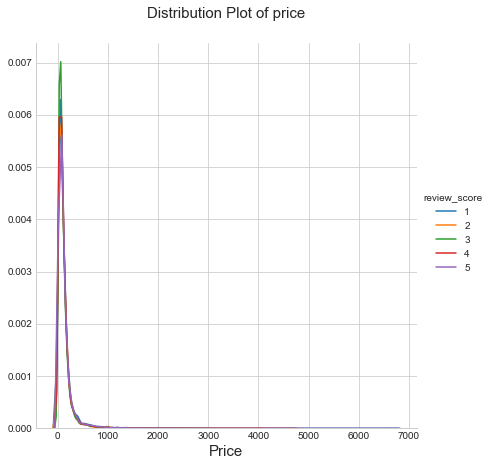

In [23]:

#for i in numeric_col_list:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'price').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('price'),size=15,y=1.05)
plt.xlabel('Price',size=15)
plt.show()



<b>Observation</b>
1. Price is going to very high and review peek is very very low so conclusion is most of the customer buy product less then 1000 
2. When price between 0 to 1000 the peek of negative review is high in comparison to 5 rating so we can conclude that price between 0.85 to 1000 product quality can be not good or product is not delevered in correct time
major overlapping so based only price is impossible to classify the review

In [24]:
#https://stackoverflow.com/questions/19894939/calculate-arbitrary-percentile-on-pandas-groupby
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [25]:
new_df_numeric.groupby('review_score')['price'].agg([percentile(25),percentile(50), percentile(75)])

,percentile_25,percentile_50,percentile_75
review_score,,,
1,39.99,75.0,138.0
2,39.90,72.0,130.0
3,39.00,69.9,129.0
4,39.90,75.0,134.0
5,39.90,74.9,135.0


In [26]:
np.percentile(new_df_numeric.price,50)

new_df_numeric.groupby('review_score')['price'].min()


review_score
1    0.85
2    5.31
3    3.06
4    0.85
5    0.85
Name: price, dtype: float64

## Feature engineering of Price Create new feature from Price

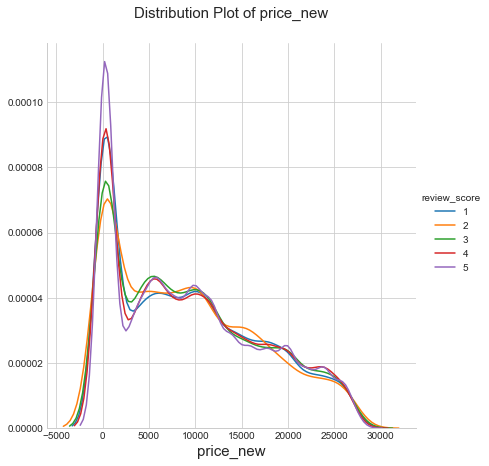

In [27]:
new_df_numeric['price_new']=new_df_numeric.price

new_df_numeric['price_new'].mean()

index_val=new_df_numeric[(new_df_numeric.price_new<138.0)]['price_new'].index.tolist()
new_df_numeric.loc[index_val,'price_new']=(new_df_numeric['price_new']/.01)*2
#len(index_val)

sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'price_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('price_new'),size=15,y=1.05)
plt.xlabel('price_new',size=15)
plt.show()


In [28]:
# new_df_numeric['price_new1']=new_df_numeric['price_new1'] * (13.5-0.5) +0.5

In [29]:
# new_df_numeric['price_new']=new_df_numeric['price']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

# #new_df_numeric['price_new']=
# #for 5
# index_val=new_df_numeric[(new_df_numeric.review_score==5) &  (new_df_numeric.price_new<135.0)]['price_new'].index.tolist()
# new_df_numeric.loc[index_val,'price_new']=new_df_numeric['price_new']*0.2

# #for 4
# index_val=new_df_numeric[(new_df_numeric.review_score==4) &  (new_df_numeric.price_new<134.0)]['price_new'].index.tolist()
# new_df_numeric.loc[index_val,'price_new']=new_df_numeric['price_new']*3

# #for 3
# index_val=new_df_numeric[(new_df_numeric.review_score==3) &  (new_df_numeric.price_new<129.0)]['price_new'].index.tolist()
# new_df_numeric.loc[index_val,'price_new']=new_df_numeric['price_new']*4

# #for 2
# index_val=new_df_numeric[(new_df_numeric.review_score==2) &  (new_df_numeric.price_new<130.0)]['price_new'].index.tolist()
# new_df_numeric.loc[index_val,'price_new']=new_df_numeric['price_new']*5

# #for 1
# index_val=new_df_numeric[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<138.0)]['price_new'].index.tolist()
# new_df_numeric.loc[index_val,'price_new']=new_df_numeric['price_new']*6


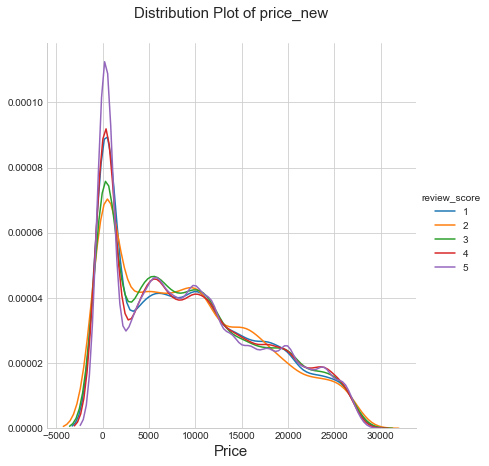

In [30]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'price_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('price_new'),size=15,y=1.05)
plt.xlabel('Price',size=15)
plt.show()



In [31]:
new_df_numeric.groupby('review_score')['price_new'].agg([percentile(25),percentile(50), percentile(75)])

,percentile_25,percentile_50,percentile_75
review_score,,,
1,1399.0,7998.0,15000.0
2,1998.0,7998.0,14998.0
3,2730.0,7998.0,15180.0
4,1980.0,7998.0,15400.0
5,1800.0,7998.0,15000.0


In [32]:
print(new_df_numeric.groupby('review_score')['price_new'].max())
print(new_df_numeric.groupby('review_score')['price'].max())


review_score
1    27580.0
2    27580.0
3    27580.0
4    27598.0
5    27598.0
Name: price_new, dtype: float64
review_score
1    6729.0
2    3999.0
3    2899.0
4    4690.0
5    6735.0
Name: price, dtype: float64


<b>Observation</b>
1. Create new feature using Feature engineering. 
2. Some seperation can be see so this feature can be useful.

In [33]:
#add this feature to final dataset
df_final['price_new']=new_df_numeric['price_new']

## Distribution of freight_value

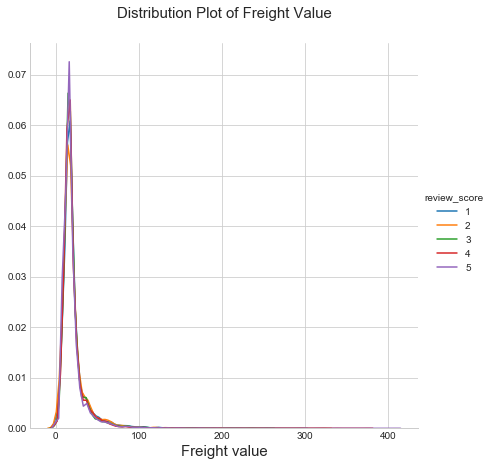

In [34]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'freight_value').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Freight Value'),size=15,y=1.05)
plt.xlabel('Freight value',size=15)
plt.show()



<b>Observation</b>:- 

1.major overlapping so based only freight_value is impossible to classify the review

2.Peek is high of review 5 so we can conclude that if company take the shipping charges and and deleiverd the product giving time then customer is give high review so negative review is also high  so conclude that customer not want the shiping charges or order is not delevered in giving time 



In [35]:
new_df_numeric.groupby('review_score')['freight_value'].agg([percentile(25),percentile(50), percentile(75),percentile(90)])

,percentile_25,percentile_50,percentile_75,percentile_90
review_score,,,,
1,13.71,16.840,22.6200,37.040
2,13.00,16.395,22.1900,37.033
3,13.46,16.580,21.6300,34.206
4,13.37,16.490,21.5175,34.180
5,12.82,16.110,20.7600,32.060


## Feature engineering of freight_value_new Create new feature from freight_value

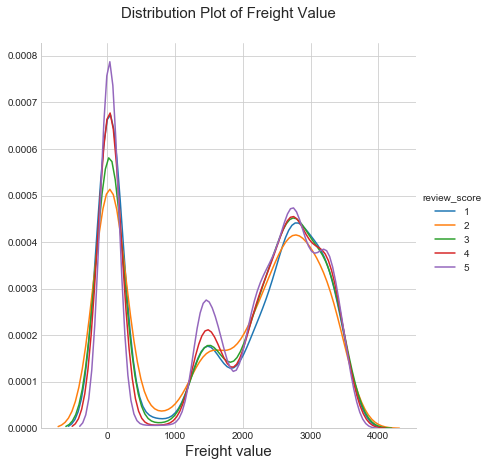

In [36]:
new_df_numeric['freight_value_new']=new_df_numeric['freight_value']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

#new_df_numeric['price_new']=
#for 5
index_val=new_df_numeric[ (new_df_numeric.freight_value_new<20.0)]['freight_value_new'].index.tolist()
new_df_numeric.loc[index_val,'freight_value_new']=(new_df_numeric['freight_value_new']/0.2)*35.89


sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'freight_value_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Freight Value'),size=15,y=1.05)
plt.xlabel('Freight value',size=15)
plt.show()


In [37]:
# new_df_numeric['freight_value_new']=new_df_numeric['freight_value']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

# #new_df_numeric['price_new']=
# #for 5
# index_val=new_df_numeric[(new_df_numeric.review_score==5) &  (new_df_numeric.freight_value_new<20.7600)]['freight_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'freight_value_new']=new_df_numeric['freight_value_new']*0.4

# #for 4
# index_val=new_df_numeric[(new_df_numeric.review_score==4) &  (new_df_numeric.freight_value_new<22.1900)]['freight_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'freight_value_new']=new_df_numeric['freight_value_new']*2.3

# #for 3
# index_val=new_df_numeric[(new_df_numeric.review_score==3) &  (new_df_numeric.freight_value_new<21.6300)]['freight_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'freight_value_new']=new_df_numeric['freight_value_new']*4

# #for 2
# index_val=new_df_numeric[(new_df_numeric.review_score==2) &  (new_df_numeric.freight_value_new<21.5175)]['freight_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'freight_value_new']=new_df_numeric['freight_value_new']*1.3

# #for 1
# index_val=new_df_numeric[(new_df_numeric.review_score==1) &  (new_df_numeric.freight_value_new<22.620)]['freight_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'freight_value_new']=new_df_numeric['freight_value_new']*3

In [38]:
# sns.set_style('whitegrid')
# sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'freight_value_new').add_legend()#sns.kdeplot
    
# plt.title("Distribution Plot of {0}".format('Freight Value'),size=15,y=1.05)
# plt.xlabel('Freight value',size=15)
# plt.show()


In [39]:
#add this feature to final dataset
df_final['freight_value_new']=new_df_numeric['freight_value_new']

## Distribution of product_length_cm

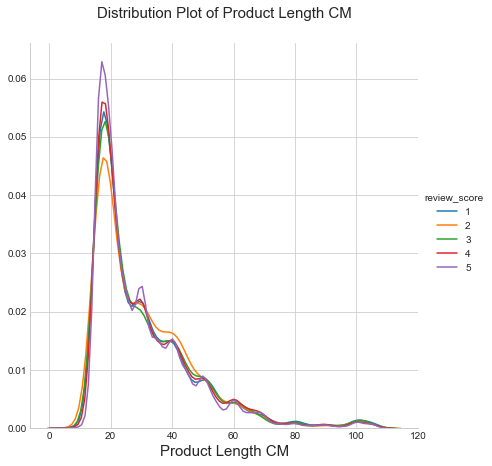

In [40]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'product_length_cm').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Product Length CM'),size=15,y=1.05)
plt.xlabel('Product Length CM',size=15)
plt.show()



<b>Observation</b>:- 

1. Many product length is less then or equal to 20 and review of 5 rating is high
2. Many overlapping in this so based on this feature not possible to classify

In [41]:
new_df_numeric.groupby('review_score')['product_length_cm'].agg([percentile(25),percentile(50), percentile(75)])

,percentile_25,percentile_50,percentile_75
review_score,,,
1,18.0,25.0,39.0
2,18.0,26.0,40.0
3,18.0,25.0,40.0
4,18.0,25.0,40.0
5,18.0,25.0,37.0


## Feature engineering of product_length_cm Create new feature from product_length_cm_new

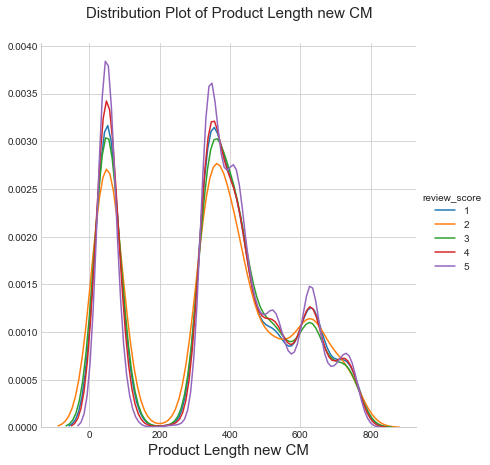

In [42]:
new_df_numeric['product_length_cm_new']=new_df_numeric['product_length_cm']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

#new_df_numeric['price_new']=
#for 5
index_val=new_df_numeric[ (new_df_numeric.product_length_cm_new<37.0)]['product_length_cm_new'].index.tolist()
new_df_numeric.loc[index_val,'product_length_cm_new']=(new_df_numeric['product_length_cm_new']/.1)*2.1

sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'product_length_cm_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Product Length new CM'),size=15,y=1.05)
plt.xlabel('Product Length new CM',size=15)
plt.show()



In [43]:
# new_df_numeric['product_length_cm_new']=new_df_numeric['product_length_cm']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

# #new_df_numeric['price_new']=
# #for 5
# index_val=new_df_numeric[(new_df_numeric.review_score==5) &  (new_df_numeric.product_length_cm_new<37.0)]['product_length_cm_new'].index.tolist()
# new_df_numeric.loc[index_val,'product_length_cm_new']=new_df_numeric['product_length_cm_new']*0.1

# #for 4
# index_val=new_df_numeric[(new_df_numeric.review_score==4) &  (new_df_numeric.product_length_cm_new<40.0)]['product_length_cm_new'].index.tolist()
# new_df_numeric.loc[index_val,'product_length_cm_new']=new_df_numeric['product_length_cm_new']*0.7

# #for 3
# index_val=new_df_numeric[(new_df_numeric.review_score==3) &  (new_df_numeric.product_length_cm_new<40.0)]['product_length_cm_new'].index.tolist()
# new_df_numeric.loc[index_val,'product_length_cm_new']=new_df_numeric['product_length_cm_new']*0.8

# #for 2
# index_val=new_df_numeric[(new_df_numeric.review_score==2) &  (new_df_numeric.product_length_cm_new<40.0)]['product_length_cm_new'].index.tolist()
# new_df_numeric.loc[index_val,'product_length_cm_new']=new_df_numeric['product_length_cm_new']*0.9

# #for 1
# index_val=new_df_numeric[(new_df_numeric.review_score==1) &  (new_df_numeric.product_length_cm_new<39.0)]['product_length_cm_new'].index.tolist()
# new_df_numeric.loc[index_val,'product_length_cm_new']=new_df_numeric['product_length_cm_new']*0.89

In [44]:
# sns.set_style('whitegrid')
# sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'product_length_cm_new').add_legend()#sns.kdeplot
    
# plt.title("Distribution Plot of {0}".format('Product Length new CM'),size=15,y=1.05)
# plt.xlabel('Product Length new CM',size=15)
# plt.show()



<b>Observation</b>:- 

1. some seperation can be see so this feature can be useful

In [45]:
#add to the final dataframe
df_final['product_length_cm_new']=new_df_numeric['product_length_cm_new']

## Distribution of product_weight_g

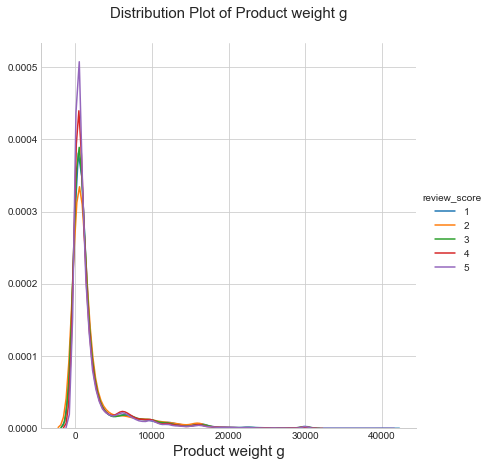

In [46]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'product_weight_g').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Product weight g'),size=15,y=1.05)
plt.xlabel('Product weight g',size=15)
plt.show()

<b>Observation</b>:- 

1:- Most of the overlapping in review score with Product weight.
2:- Product weight with less then the review score 5 peek is heigh.
3:- Product weight is increase the distribution is going down. Means very less product have weight is high.


In [47]:
for i in range(25,100,10):
    print('{0} Percentile value is {1}'.format(i,np.percentile(new_df_numeric.product_weight_g,i)))
 

25 Percentile value is 300.0
35 Percentile value is 400.0
45 Percentile value is 592.0
55 Percentile value is 850.0
65 Percentile value is 1250.0
75 Percentile value is 1800.0
85 Percentile value is 3663.0
95 Percentile value is 9850.0


<b>Observation</b>:-
1. Only 5 % value of product have weight grater than   9850.0
2. It can be situation of Outlier
    

In [48]:
new_df_numeric.groupby('review_score')['product_weight_g'].agg([percentile(25),percentile(50), percentile(75)])

,percentile_25,percentile_50,percentile_75
review_score,,,
1,300.0,750.0,1850.0
2,300.0,710.0,1900.0
3,300.0,700.0,1825.0
4,300.0,700.0,1850.0
5,300.0,690.0,1750.0


## Feature engineering of product_weight_g Create new feature from product_weight_g_new

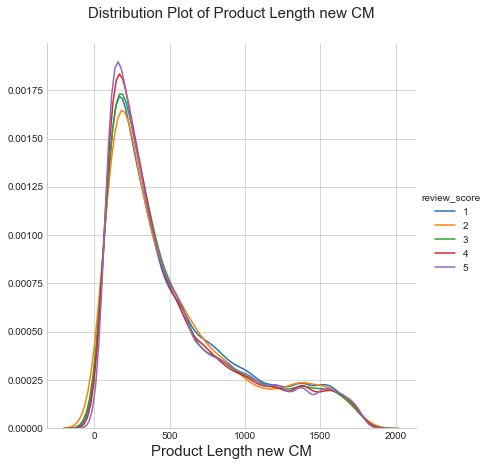

In [49]:
new_df_numeric['product_weight_g_new']=new_df_numeric['product_weight_g']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

#new_df_numeric['price_new']=
#for 5
index_val=new_df_numeric[ (new_df_numeric.product_weight_g_new>1750.0)]['product_weight_g_new'].index.tolist()
new_df_numeric.loc[index_val,'product_weight_g_new']=(new_df_numeric['product_weight_g_new']/22.09)#*12.1

sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'product_weight_g_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Product Length new CM'),size=15,y=1.05)
plt.xlabel('Product Length new CM',size=15)
plt.show()



In [50]:
df_final['product_weight_g_new']=new_df_numeric['product_weight_g_new']

## Distribution of payment_value 

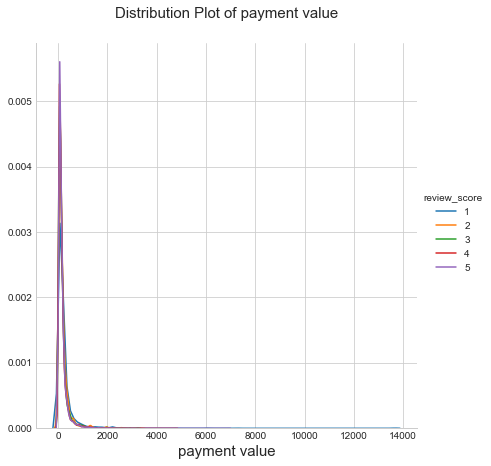

In [51]:

sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'payment_value').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('payment value'),size=15,y=1.05)
plt.xlabel('payment value',size=15)
plt.show()


<b>Observation</b>:-
1. major overlapping all the review class class review 5 is high 
2. only based on this feature we can not classify the review.
    

## Feature engineering of payment_value Create new feature from payment_value_new

In [52]:
new_df_numeric.groupby('review_score')['payment_value'].agg([percentile(25),percentile(50), percentile(75)])

,percentile_25,percentile_50,percentile_75
review_score,,,
1,73.040,135.320,239.6000
2,64.790,119.485,213.4700
3,59.815,107.090,187.7525
4,59.220,104.585,182.2000
5,58.610,104.370,180.0850


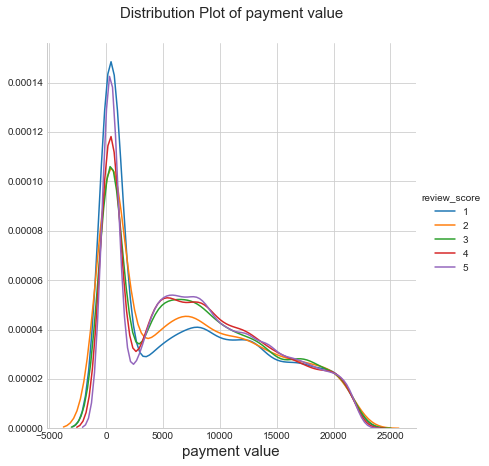

In [53]:
new_df_numeric['payment_value_new']=new_df_numeric['payment_value']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

#new_df_numeric['price_new']=
#for 5
index_val=new_df_numeric[  (new_df_numeric.payment_value_new<180.0850)]['payment_value_new'].index.tolist()
new_df_numeric.loc[index_val,'payment_value_new']=(new_df_numeric['payment_value_new']/0.1)*12.2



sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'payment_value_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('payment value'),size=15,y=1.05)
plt.xlabel('payment value',size=15)
plt.show()



In [54]:

# new_df_numeric['payment_value_new']=new_df_numeric['payment_value']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

# #new_df_numeric['price_new']=
# #for 5
# index_val=new_df_numeric[(new_df_numeric.review_score==5) &  (new_df_numeric.payment_value_new<180.0850)]['payment_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'payment_value_new']=new_df_numeric['payment_value_new']*0.2

# #for 4
# index_val=new_df_numeric[(new_df_numeric.review_score==4) &  (new_df_numeric.payment_value_new<182.2000)]['payment_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'payment_value_new']=new_df_numeric['payment_value_new']*6

# #for 3
# index_val=new_df_numeric[(new_df_numeric.review_score==3) &  (new_df_numeric.payment_value_new<187.7525)]['payment_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'payment_value_new']=new_df_numeric['payment_value_new']*8

# #for 2
# index_val=new_df_numeric[(new_df_numeric.review_score==2) &  (new_df_numeric.payment_value_new<213.4700)]['payment_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'payment_value_new']=new_df_numeric['payment_value_new']*9

# #for 1
# index_val=new_df_numeric[(new_df_numeric.review_score==1) &  (new_df_numeric.payment_value_new<239.6000)]['payment_value_new'].index.tolist()
# new_df_numeric.loc[index_val,'payment_value_new']=new_df_numeric['payment_value_new']*9

In [55]:

# sns.set_style('whitegrid')
# sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'payment_value_new').add_legend()#sns.kdeplot
    
# plt.title("Distribution Plot of {0}".format('payment value'),size=15,y=1.05)
# plt.xlabel('payment value',size=15)
# plt.show()


<b>Observation</b>:- 

1. some seperation can be see so this feature can be useful

In [56]:
#add to the final dataframe
df_final['payment_value_new']=new_df_numeric['payment_value_new']

## Distribution of payment_installments 


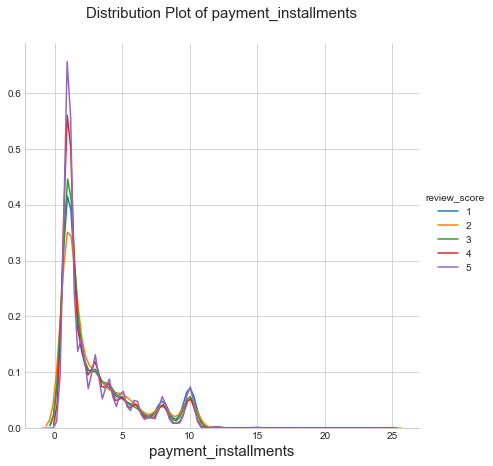

In [57]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'payment_installments').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('payment_installments'),size=15,y=1.05)
plt.xlabel('payment_installments',size=15)
plt.show()



<b>Observation</b>:-

1. major over lapping.
2. Distribution of installments is almost similar among all the ratings.
3. payment_installment alone cannot distinguish among the ratings.

## Feature engineering of payment_installments Create new feature from payment_installments_new

In [58]:
new_df_numeric.groupby('review_score')['payment_installments'].agg([percentile(25),percentile(50), percentile(75)])

,percentile_25,percentile_50,percentile_75
review_score,,,
1,1,2,5
2,1,2,4
3,1,2,4
4,1,1,4
5,1,1,4


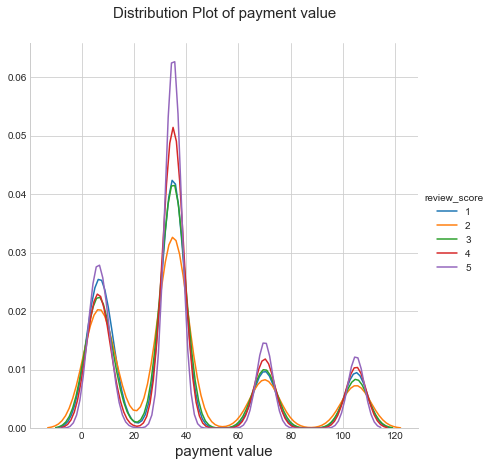

In [59]:
new_df_numeric['payment_installments_new']=new_df_numeric['payment_installments']#[(new_df_numeric.review_score==1) &  (new_df_numeric.price_new<129.0)]['price_new']-2

#new_df_numeric['price_new']=
#for 5
index_val=new_df_numeric[  (new_df_numeric.payment_installments_new<4)]['payment_installments_new'].index.tolist()
new_df_numeric.loc[index_val,'payment_installments_new']=(new_df_numeric['payment_installments_new']*35)#*12.2



sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'payment_installments_new').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('payment value'),size=15,y=1.05)
plt.xlabel('payment value',size=15)
plt.show()


In [60]:
df_final['payment_installments_new']=new_df_numeric['payment_installments_new']

## Distribution of product_photos_qty 

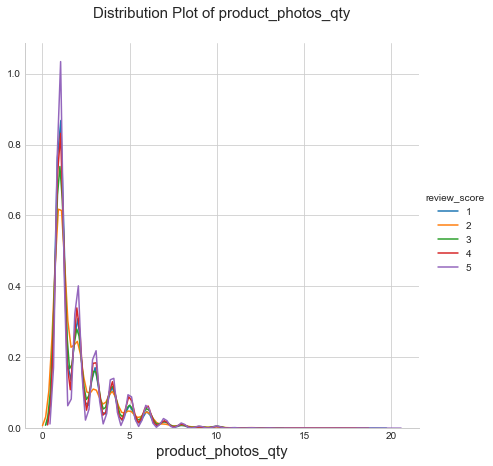

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'product_photos_qty').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('product_photos_qty'),size=15,y=1.05)
plt.xlabel('product_photos_qty',size=15)
plt.show()



<b>observation</b>:- 
1. major over lapping

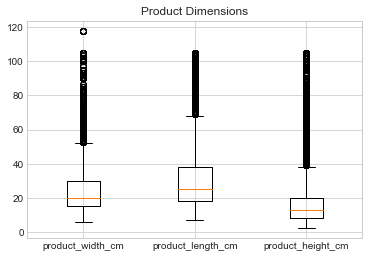

In [62]:
data1=[new_df_numeric.product_width_cm,new_df_numeric.product_length_cm,new_df_numeric.product_height_cm]

# plt.boxplot(y=data1,vert=False)
# plt.title("Box Plots of Product Dimensions")

plt.boxplot(data1,labels=['product_width_cm','product_length_cm','product_height_cm'])
plt.title('Product Dimensions')
plt.show()

#major overlapping between product_width_cm ,product_length_cm


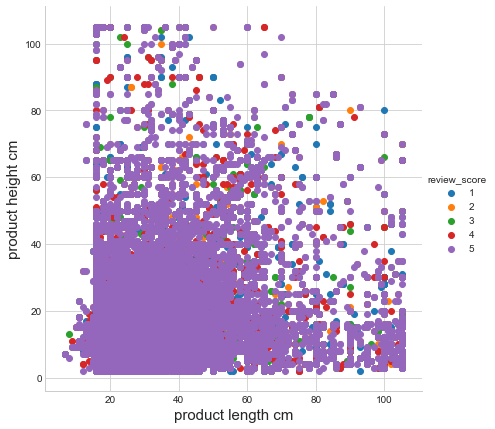

In [63]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6.0).map(plt.scatter,'product_length_cm','product_height_cm').add_legend()
plt.xlabel('product length cm',size=15)
plt.ylabel('product height cm',size=15)
plt.show()

#sns.FacetGrid(new_df_numeric,hue="review_score",size=5).map(plt.scatter,"age","nodes").add_legend();

In [64]:
new_df_numeric.columns

Index(['zip_code_prefix_customer', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'order_item_id', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_seller', 'price_new', 'freight_value_new',
       'product_length_cm_new', 'product_weight_g_new', 'payment_value_new',
       'payment_installments_new'],
      dtype='object')

In [65]:
new_df_numeric.columns

Index(['zip_code_prefix_customer', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'order_item_id', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_seller', 'price_new', 'freight_value_new',
       'product_length_cm_new', 'product_weight_g_new', 'payment_value_new',
       'payment_installments_new'],
      dtype='object')

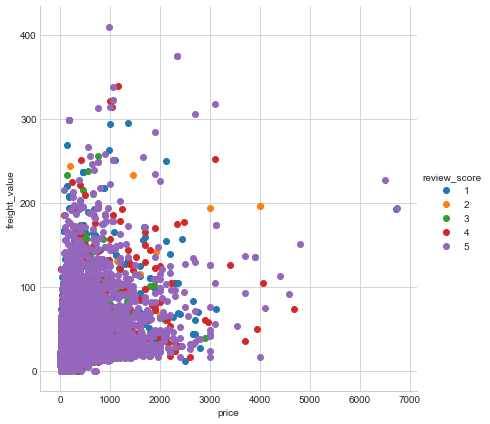

In [66]:
#sns.pairplot(new_df_numeric,hue='review_score')
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6.0).map(plt.scatter,'price','freight_value').add_legend()
plt.show()

#It is very hard to say anything about the reviews on the basis of these plot as data-points are not seperable based on reviews these are completely mixed data

## Bivariate analysis

<b> We can compare pair of features at one by one to distinguish between review_scores. But each pair is very costly since we have more number of features.

In [67]:
np.unique(new_df_numeric.payment_sequential)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

C:\Users\MSME\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\MSME\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\MSME\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

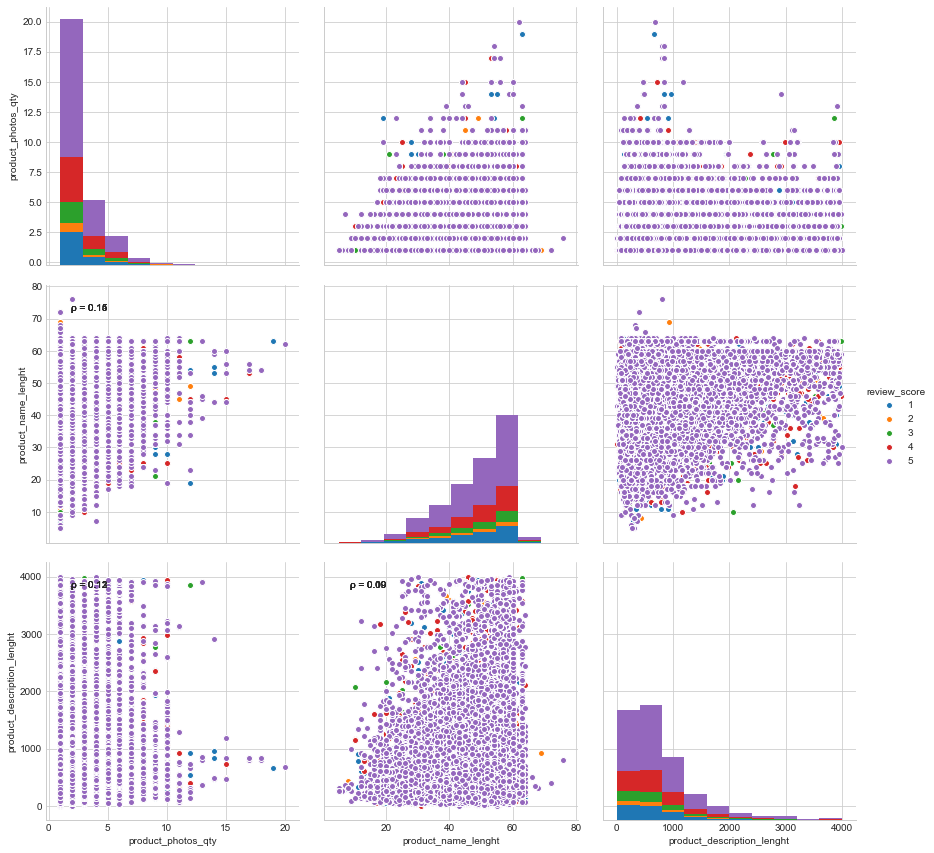

In [68]:
#https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
    
new_df_numeric[['product_name_lenght','product_description_lenght','product_photos_qty']]

plt.close()
g=sns.pairplot(new_df_numeric,size=4.0,hue='review_score',vars=['product_photos_qty','product_name_lenght','product_description_lenght'])
g.map_lower(corrfunc)
plt.show()



<b>observation</b>:- 
1. we can easily check more overlapping between pair of feature so we can not easily classifi the review

C:\Users\MSME\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\MSME\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\MSME\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

[]

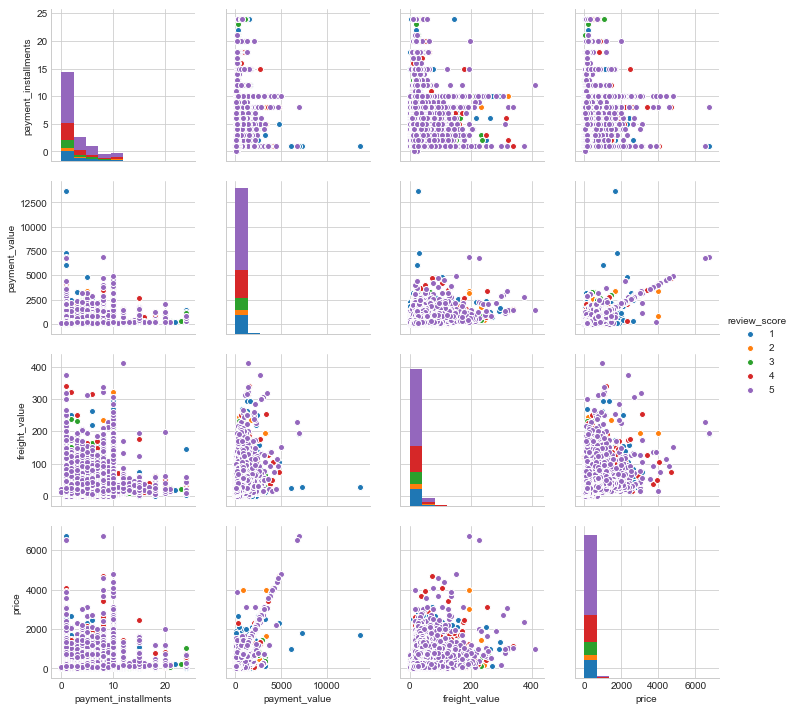

In [69]:

plt.close()
sns.pairplot(new_df_numeric,hue='review_score',vars=['payment_installments','payment_value','freight_value','price'])
#g.map_lower(corrfunc)
plt.plot()

<b>observation</b>:- 
1. we can easily check more overlapping between pair of feature so we can not easily classifi the review
2. Some relation between payment_value and price we saw in corelation but major overlapping 
3. some relation in freight_value and price major overlapping


<b>Conclussion from Bivariate Analysis</b>:- 

1. So based on rule based method (val < this point and val > this point) can not classify the review score.
2. There is no clear separation when we check with pair of features.
3. Simple classification is not possible

<b>Some Option for classification</b>

option 1: By the combination of more features, it could be possible to classify the points, since in the higher dimenions, there are more possibility of clear separation of datapoints.

option 2: We should create more features using the existing features.

In [70]:
#https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e
#https://towardsdatascience.com/python-statistics-for-beginners-pearson-correlation-coefficient-69c9b1ef17f7

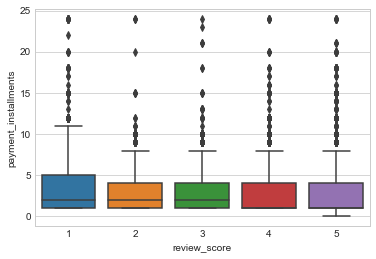

In [71]:
new_df_numeric.payment_installments.value_counts()
sns.boxplot(y='payment_installments',x='review_score',data=new_df_numeric)


25 percentile is 1.0
35 percentile is 1.0
45 percentile is 1.0
55 percentile is 1.0
65 percentile is 1.0
75 percentile is 1.0
85 percentile is 1.0
95 percentile is 1.0


review_score
1    1.112249
2    1.102720
3    1.062730
4    1.085075
5    1.096359
Name: payment_sequential, dtype: float64

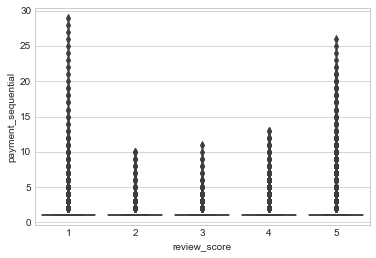

In [72]:
new_df_numeric.payment_installments.value_counts()
sns.boxplot(y='payment_sequential',x='review_score',data=new_df_numeric)

for i in range(25,100,10):
    print('{0} percentile is {1}'.format(i,np.percentile(new_df_numeric.payment_sequential,i)))
    
new_df_numeric.groupby('review_score')['payment_sequential'].mean()    


<b>Observation from Payment sequential</b>
1. All percentile have same. Highly overlapping.
2. This feature is we can say not good but cosider it for some analysis

In [73]:
#np.percentile(new_df_numeric.payment_installments,50)
new_df_numeric.groupby('review_score')['payment_installments'].apply(lambda x: np.percentile(x,75))

review_score
1    5.0
2    4.0
3    4.0
4    4.0
5    4.0
Name: payment_installments, dtype: float64

<b>Observation</b>:-

1:- payment_installments is a discrete feature

2:- Rating 5, 75 % (percentaile) is less then comparison to rating 1. all 75 % same of 3 ,4 ,5 rating

3:- Means 75 % point of rating 2,3,4,5 have installment below  4.

4:- If payment installment high then the low rating point is more.



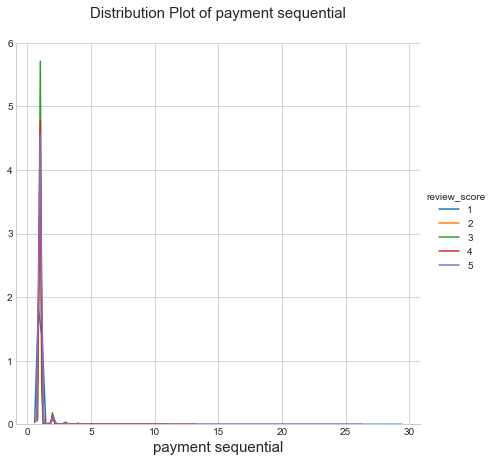

In [74]:
np.unique(new_df_numeric.payment_sequential)

sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'payment_sequential').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('payment sequential'),size=15,y=1.05)
plt.xlabel('payment sequential',size=15)
plt.show()

#sns.boxplot(y='payment_sequential',x='review_score',data=new_df_numeric)

## Observation from numerical feature analysis

1. All the feature is highly overlapped so by only use this feature alone we can not create good model
2. We have to create some new feature price_new,freight_value_new,product_length_cm_new,payment_value_new  it can be help ful according to distribution plot some seperation we can see so we consider it.
3. Note : Another observation one can make is some of the data is not normally distributed, so if we have to build a prediction/ ML regression model then we would have to transform numerical data.



## Date Time Feature Analysis

In [75]:
#date time feature engg and extract feature form date

new_df_date.head(2)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12
1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18


In [76]:
def extract_feature_from_date(dataval,colname):  
    #day,month, year
    dataval[colname+'_day']=dataval[colname].dt.day
    dataval[colname+'_month']=dataval[colname].dt.month
    dataval[colname+'_year']=dataval[colname].dt.year
    
    #day month yer
    
#   dataval[colname+'_hour']=dataval[colname].dt.hour
#   dataval[colname+'_minute']=dataval[colname].dt.minute
#   dataval[colname+'_second']=dataval[colname].dt.second
    
    #week day,week
    dataval[colname+'_weekday']=dataval[colname].dt.weekday
    dataval[colname+'_week']=dataval[colname].dt.week
    
    return dataval
    
    
    
    

In [77]:
import copy
new_df_date.order_purchase_timestamp.dt.month

df_Date=copy.deepcopy(new_df_date)




df_Date['review_score']=new_df_numeric.review_score

extract_feature_from_date(df_Date,'order_purchase_timestamp')
extract_feature_from_date(df_Date,'order_approved_at')
extract_feature_from_date(df_Date,'order_delivered_carrier_date')
extract_feature_from_date(df_Date,'order_delivered_customer_date')
extract_feature_from_date(df_Date,'order_estimated_delivery_date')
#extract_feature_from_date(df_final_date,'shipping_limit_date')


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_score,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,...,order_delivered_customer_date_day,order_delivered_customer_date_month,order_delivered_customer_date_year,order_delivered_customer_date_weekday,order_delivered_customer_date_week,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,order_estimated_delivery_date_weekday,order_estimated_delivery_date_week
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12,4,16,5,2017,...,25,5,2017,3,21,5,6,2017,0,23
1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,1,9,11,2017,...,28,11,2017,1,48,19,12,2017,1,51
2,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,1,9,11,2017,...,28,11,2017,1,48,19,12,2017,1,51
3,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,2017-05-22 22:22:56,3,7,5,2017,...,26,5,2017,4,21,12,6,2017,0,24
4,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,2018-02-18 21:29:19,4,3,2,2018,...,28,2,2018,2,9,22,3,2018,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,2018-04-06 22:05:04,2018-04-18,2018-04-05 19:55:18,4,31,3,2018,...,6,4,2018,4,14,18,4,2018,2,16
116577,2017-04-09 20:04:37,2017-04-11 03:45:26,2017-04-12 07:03:58,2017-04-18 09:53:40,2017-05-04,2017-04-17 03:45:26,1,9,4,2017,...,18,4,2017,1,16,4,5,2017,3,18
116578,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,2017-09-05 21:42:35,2017-09-19,2017-09-01 10:05:04,5,28,8,2017,...,5,9,2017,1,36,19,9,2017,1,38
116579,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28,2017-08-04 18:25:20,5,31,7,2017,...,9,8,2017,2,32,28,8,2017,0,35


### Feature engineering on column "order_delivered_customer_date" and  "order_purchase_timestamp" get the days how to much time take 

In [78]:

df_Date['Duration_delivered_Purchase_days']=(df_Date['order_delivered_customer_date']-df_Date['order_purchase_timestamp']).dt.days

df_Date['Duration_Estimated_delivered_days']=(df_Date['order_estimated_delivery_date']-df_Date['order_purchase_timestamp']).dt.days


#df_final_date['Duration_shipping_carrier']=(df_final_date['shipping_limit_date']-df_final_date['order_delivered_carrier_date']).dt.days

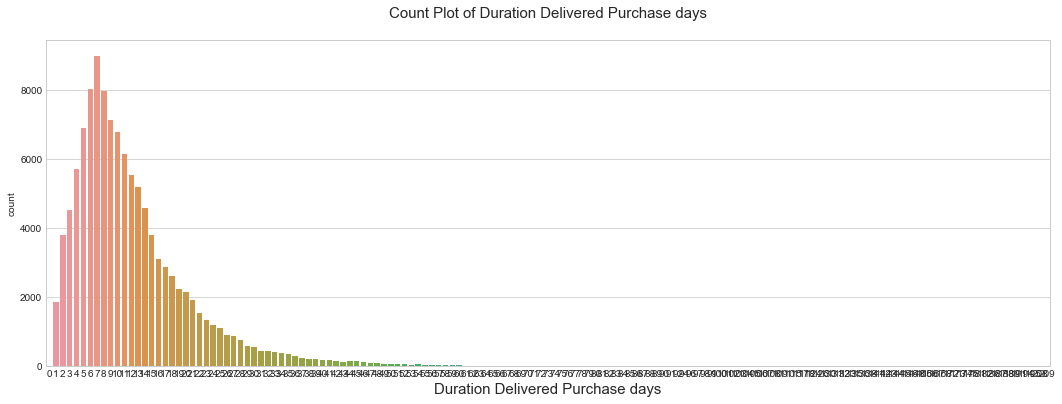

7      9000
6      8032
8      7978
9      7134
5      6902
       ... 
146       1
209       1
208       1
143       1
91        1
Name: Duration_delivered_Purchase_days, Length: 147, dtype: int64

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,6))
#sns.FacetGrid(df_final_ColDate,size=6).map(sns.kdeplot,'Duration_delivered_Purchase').add_legend()#sns.kdeplot
sns.countplot(df_Date.Duration_delivered_Purchase_days,data=df_Date)
    
plt.title("Count Plot of {0}".format('Duration Delivered Purchase days'),size=15,y=1.05)
plt.xlabel('Duration Delivered Purchase days',size=15)
plt.show()
df_Date.Duration_delivered_Purchase_days.value_counts()

#most of the product delevired with in 7 days

In [80]:
print("50th percentile of arr : ",
       np.percentile(df_Date.Duration_delivered_Purchase_days, 99))

50th percentile of arr :  46.0


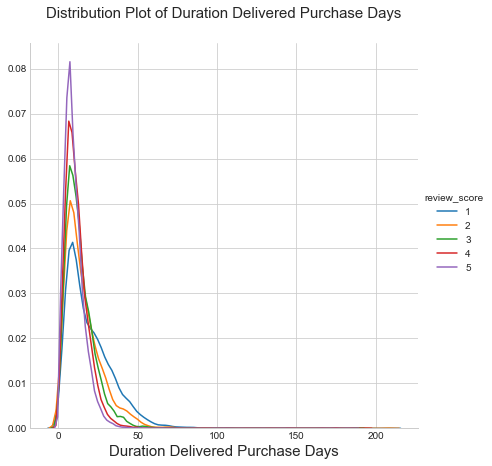

In [81]:
sns.set_style('whitegrid')
sns.FacetGrid(df_Date,hue='review_score',size=6).map(sns.kdeplot,'Duration_delivered_Purchase_days').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Duration Delivered Purchase Days'),size=15,y=1.05)
plt.xlabel('Duration Delivered Purchase Days',size=15)
plt.show()

<b>observation from new created feature Duration_delivered_Purchase_days dist plot</b>
1. Some class seperation can be seen
2. If delivered days is more then +ve review score is less 

## Observation from new created feature Duration_delivered_Purchase_days feature analysis

1. Most of the product delivered with in 7 days.
2. Frequency of +ve review_score is high in comparision of -ve reivew.
3. With in delivered days some -ve review also so it can be other product related issue.
4. This feature can be important for model. so consider this coloumn.

In [82]:
#add this feature in main dataset
df_final['Duration_delivered_Purchase_days']=df_Date['Duration_delivered_Purchase_days']

### Feature engineering on column how many product delivered before estimated delivery it can be cause of -ve review

In [83]:
df_Date['Delivered_Within_Estimated']=df_Date['Duration_Estimated_delivered_days']-df_Date['Duration_delivered_Purchase_days']

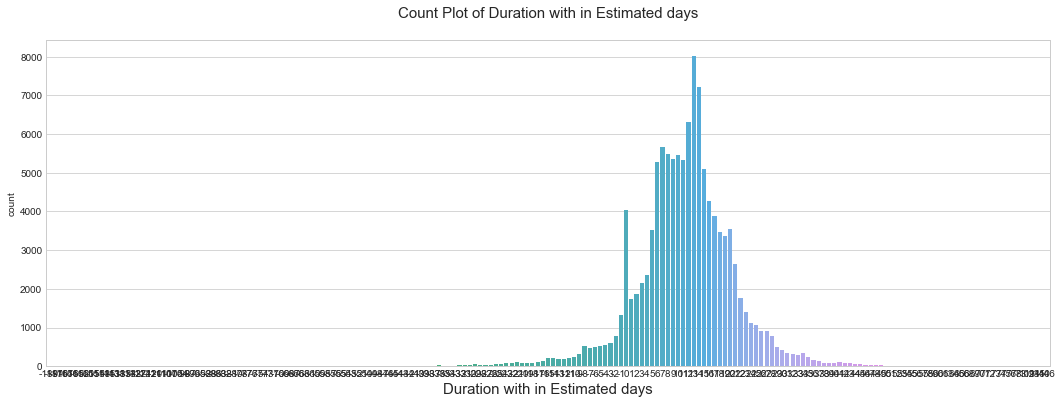

 13     8026
 14     7227
 12     6308
 7      5679
 8      5473
        ... 
-82        1
 73        1
-120       1
-80        1
-97        1
Name: Delivered_Within_Estimated, Length: 193, dtype: int64

In [87]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,6))
#sns.FacetGrid(df_final_ColDate,size=6).map(sns.kdeplot,'Duration_delivered_Purchase').add_legend()#sns.kdeplot
sns.countplot(df_Date.Delivered_Within_Estimated,data=df_Date)
    
plt.title("Count Plot of {0}".format('Duration with in Estimated days'),size=15,y=1.05)
plt.xlabel('Duration with in Estimated days',size=15)
plt.show()
df_Date.Delivered_Within_Estimated.value_counts()

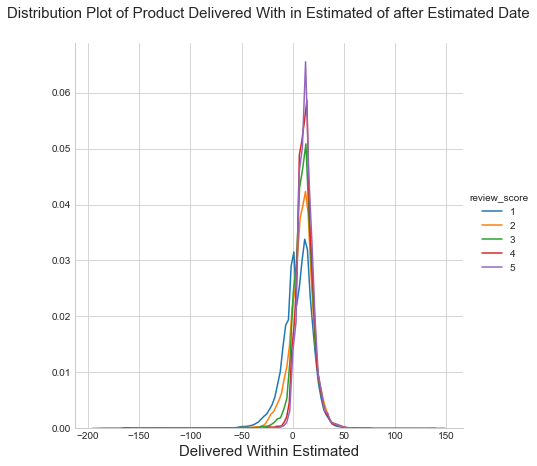

In [88]:
sns.set_style('whitegrid')
sns.FacetGrid(df_Date,hue='review_score',size=6).map(sns.kdeplot,'Delivered_Within_Estimated').add_legend()#sns.kdeplot
    
plt.title("Distribution Plot of {0}".format('Product Delivered With in Estimated of after Estimated Date'),size=15,y=1.05)
plt.xlabel('Delivered Within Estimated',size=15)
plt.show()

<b>observation from new created feature Delivered_Within_Estimated dist plot</b>
1. Some of the product delivered after estimated delivery date
2. Some class seperation can be seen if product delivered after estimated delivery date
3. If product delivered after estimated delivery date then the -ve review is high 
4. So this feature can be userful so consider it.

In [89]:
#add this feature in main dataset
df_final['Delivered_Within_Estimated']=df_Date['Delivered_Within_Estimated']

In [90]:
#df_final_ColDate[df_final_ColDate['Delivered_Within_Estimated']<0]['Delivered_Within_Estimated']#.value_counts()

num_of_val_notDelivered=len(df_Date[df_Date['Delivered_Within_Estimated']<0]['Delivered_Within_Estimated'])
Total_val=df_Date.shape[0]

num_of_val_Delivered=len(df_Date[df_Date['Delivered_Within_Estimated']>=0]['Delivered_Within_Estimated'])
print('Percentage of product which not delivered in Delivered period',(num_of_val_notDelivered/Total_val)*100)
print('Percentage of product which delivered with in Delivered period',(num_of_val_Delivered/Total_val)*100)

#observation 
#1. so Duration_delivered_Purchase feature and Delivered_Within_Estimated can be imortant

Percentage of product which not delivered in Delivered period 7.142733996517421
Percentage of product which delivered with in Delivered period 92.85726600348258


In [91]:
df_Date


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_score,order_purchase_timestamp_day,order_purchase_timestamp_month,order_purchase_timestamp_year,...,order_delivered_customer_date_weekday,order_delivered_customer_date_week,order_estimated_delivery_date_day,order_estimated_delivery_date_month,order_estimated_delivery_date_year,order_estimated_delivery_date_weekday,order_estimated_delivery_date_week,Duration_delivered_Purchase_days,Duration_Estimated_delivered_days,Delivered_Within_Estimated
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12,4,16,5,2017,...,3,21,5,6,2017,0,23,8,19,11
1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,1,9,11,2017,...,1,48,19,12,2017,1,51,18,39,21
2,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,1,9,11,2017,...,1,48,19,12,2017,1,51,18,39,21
3,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12,2017-05-22 22:22:56,3,7,5,2017,...,4,21,12,6,2017,0,24,18,35,17
4,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22,2018-02-18 21:29:19,4,3,2,2018,...,2,9,22,3,2018,3,12,25,46,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,2018-04-06 22:05:04,2018-04-18,2018-04-05 19:55:18,4,31,3,2018,...,4,14,18,4,2018,2,16,6,17,11
116577,2017-04-09 20:04:37,2017-04-11 03:45:26,2017-04-12 07:03:58,2017-04-18 09:53:40,2017-05-04,2017-04-17 03:45:26,1,9,4,2017,...,1,16,4,5,2017,3,18,8,24,16
116578,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,2017-09-05 21:42:35,2017-09-19,2017-09-01 10:05:04,5,28,8,2017,...,1,36,19,9,2017,1,38,8,21,13
116579,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28,2017-08-04 18:25:20,5,31,7,2017,...,2,32,28,8,2017,0,35,9,27,18


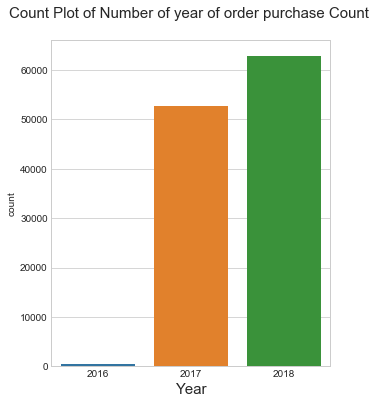

In [92]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,6))
#sns.FacetGrid(df_final_ColDate,size=6).map(sns.kdeplot,'Duration_delivered_Purchase').add_legend()#sns.kdeplot
sns.countplot(df_Date.order_purchase_timestamp_year,data=df_Date)
    
plt.title("Count Plot of {0}".format('Number of year of order purchase Count '),size=15,y=1.05)
plt.xlabel('Year',size=15)
plt.show()


<b>observation from new created feature Purchase year</b>
1. Most of the product pruchase in 2018 and 2017 and very few product purchase in 2016


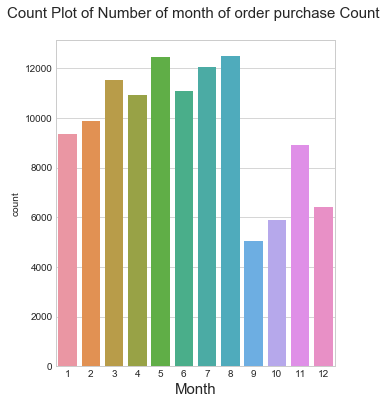

In [93]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,6))
#sns.FacetGrid(df_final_ColDate,size=6).map(sns.kdeplot,'Duration_delivered_Purchase').add_legend()#sns.kdeplot
sns.countplot(df_Date.order_purchase_timestamp_month,data=df_Date)
    
plt.title("Count Plot of {0}".format('Number of month of order purchase Count '),size=15,y=1.05)
plt.xlabel('Month',size=15)
plt.show()

<b>observation from new created feature Purchase month</b>
1. Most of the product pruchase in month 5 and 8.
2. Every month provide distribution of product.

### Feature engineering create new column from purchase month and year from above analysis

In [94]:
# df_Date.head(3)
# df_Date.iloc[:,6:].columns.to_list()

df_Date['month_year_order_purchase']=df_Date['order_purchase_timestamp_month'].astype(str)+'_'+df_Date['order_purchase_timestamp_year'].astype(str)


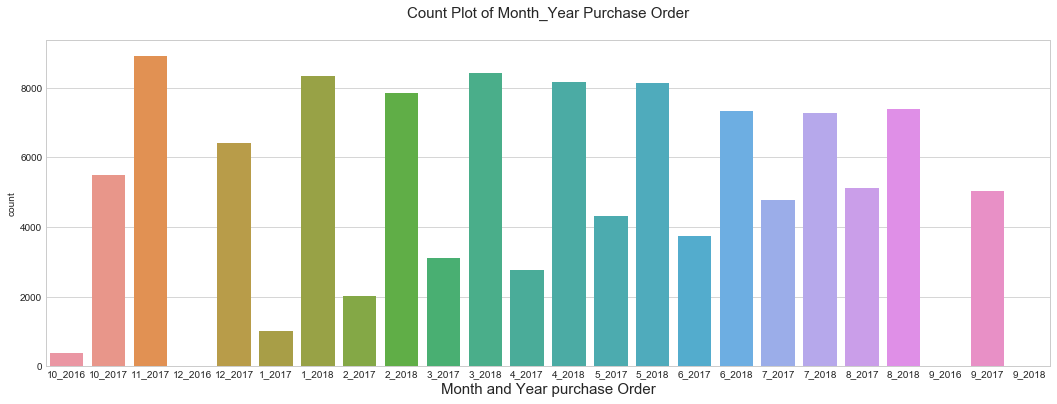

In [95]:
plt.figure(figsize=(18,6))
sns.countplot(df_Date.month_year_order_purchase,data=df_Date)#hue='review_score',
    
plt.title("Count Plot of {0}".format('Month_Year Purchase Order'),size=15,y=1.05)
plt.xlabel('Month and Year purchase Order',size=15)
plt.show()

<b>observation from new created feature Purchase month</b>
1. Most of the product pruchase in month 11_2017.
2. Every month_year provide distribution of product purchase.
3. This Monthyear (Categorical Feature) can be important for model so consider it. 

In [96]:
#add this feature in main dataset
df_final['Month_Year_Purchase_Order']=df_Date['month_year_order_purchase']

### Feature engineering create new column from Order Delivered month and year 

In [97]:
df_Date.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [98]:
#feature engg create new feature
df_Date['month_year_order_deliverd']=df_Date['order_delivered_customer_date_month'].astype(str)+'_'+df_Date['order_delivered_customer_date_year'].astype(str)


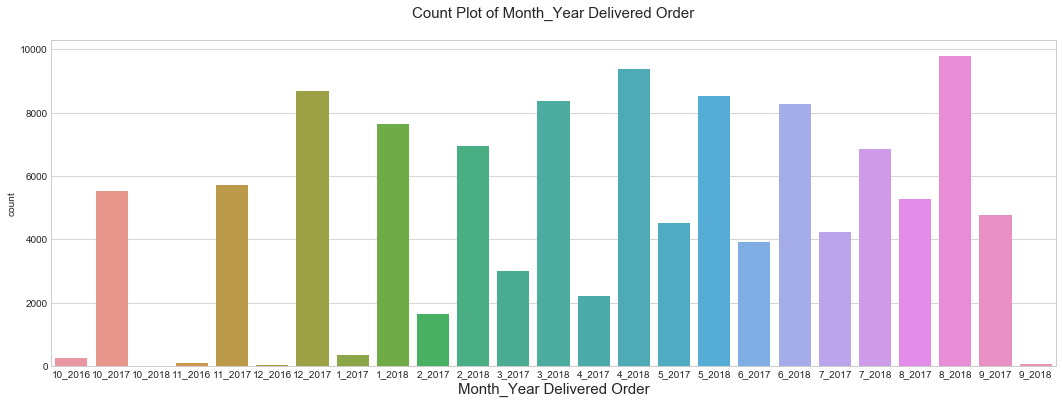

In [99]:
plt.figure(figsize=(18,6))
sns.countplot(df_Date.month_year_order_deliverd,data=df_Date)
    
plt.title("Count Plot of {0}".format('Month_Year Delivered Order'),size=15,y=1.05)
plt.xlabel('Month_Year Delivered Order',size=15)
plt.show()


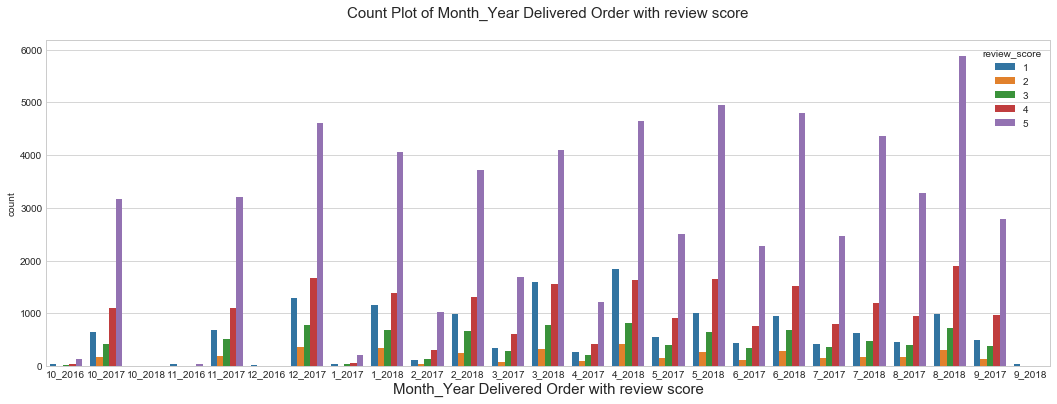

In [100]:
plt.figure(figsize=(18,6))
sns.countplot(df_Date.month_year_order_deliverd,hue='review_score',data=df_Date)
    
plt.title("Count Plot of {0}".format('Month_Year Delivered Order with review score'),size=15,y=1.05)
plt.xlabel('Month_Year Delivered Order with review score',size=15)
plt.show()

<b>observation from new created feature Delivered Order month and year</b>
1. Most of the product pruchase in month 8_2018.
2. Every month_year provide distribution of product order.
3. This Monthyear (Categorical Feature) can be important for model so consider it. 

In [101]:
#add this feature in main dataset
df_final['Month_year_order_deliverd']=df_Date['month_year_order_deliverd']

In [102]:
#drop this coloumn from main dataset
df_final.drop(columns=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)


In [103]:
# df_final.columns

## Categorical Feature Analysis

In [104]:
def stack_plot(data, xtick, col2, col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values,color = 'grey',alpha=0.5)
    p2 = plt.bar(ind, data[col2].values,color= '#2e4884',alpha=0.8)

    plt.ylabel('Reviews')
    plt.title('% of review_score  ')
    plt.xticks(ind-0.1, list(data[xtick].values), rotation=0)
    plt.legend((p1[0], p2[0]), ('total_reviews', 'positive_review'))
    plt.show()
    data.head()
    

In [105]:
#import matplotlib.pyplot as plt
# Temp=pd.DataFrame(new_df_string.groupby(['payment_type'])['review_score'].agg(lambda x: (x==5).sum())).reset_index()

# Temp['total']=list(pd.DataFrame(new_df_string.groupby(['payment_type'])['review_score'].agg([('total',lambda x: (x==5).count()),('Avg',lambda x: (x==5).mean())]))['total'])
# Temp['mean']=list(pd.DataFrame(new_df_string.groupby(['payment_type'])['review_score'].agg([('total',lambda x: (x==5).count()),('Avg',lambda x: (x==5).mean())]))['Avg'])
# Temp.rename(columns={'review_score':'Positive Review'})
# Temp.sort_values(by='total',ascending=False)

#https://towardsdatascience.com/exploratory-data-analysis-of-kaggle-datasets-9a293886f644

In [106]:
def DatsetBar(new_df_string,col_group,col_for_agg):
    Temp=pd.DataFrame(new_df_string.groupby([col_group])[col_for_agg].agg(lambda x: (x==5).sum())).reset_index()
    
    Temp['total']=list(pd.DataFrame(new_df_string.groupby([col_group])[col_for_agg].agg([('total',lambda x: (x==5).count()),('Avg',lambda x: (x==5).mean())]))['total'])
    Temp['mean']=list(pd.DataFrame(new_df_string.groupby([col_group])[col_for_agg].agg([('total',lambda x: (x==5).count()),('Avg',lambda x: (x==5).mean())]))['Avg'])
    
    Temp.rename(columns={'review_score':'Positive_Review'},inplace=True)
    Temp.sort_values(by='total',ascending=False,inplace=True)
    return Temp 




## Categorical Feature payment_type Analysis 

In [107]:
new_df_string['review_score']=df_final.review_score


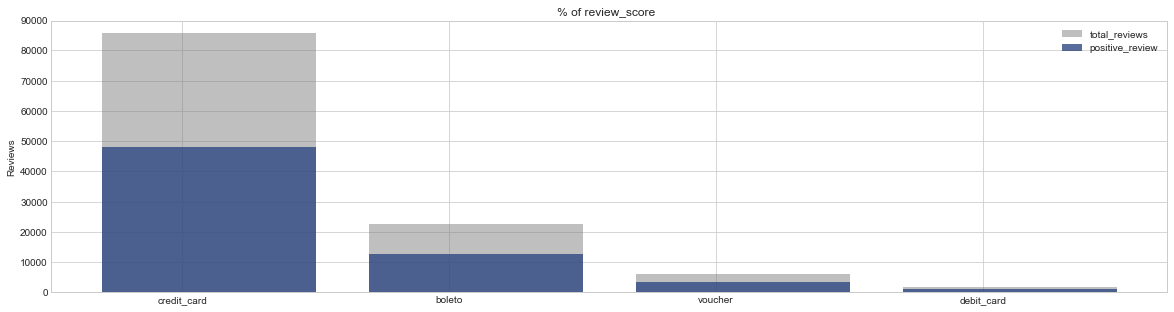

,payment_type,Positive_Review,total,mean
1,credit_card,48139,85565,0.562602
0,boleto,12568,22588,0.556402
3,voucher,3438,6191,0.555322
2,debit_card,1007,1662,0.605897


In [108]:
temp=DatsetBar(new_df_string,'payment_type','review_score')
stack_plot(temp, 'payment_type', 'Positive_Review', col3='total')
temp.head()


<b>Observation of Feature payment_type</b>
1. Most of the payment done by credit_card,boleto,voucher
2. This Featue will be use ful for model.


## Categorical Feature customer_city Analysis 

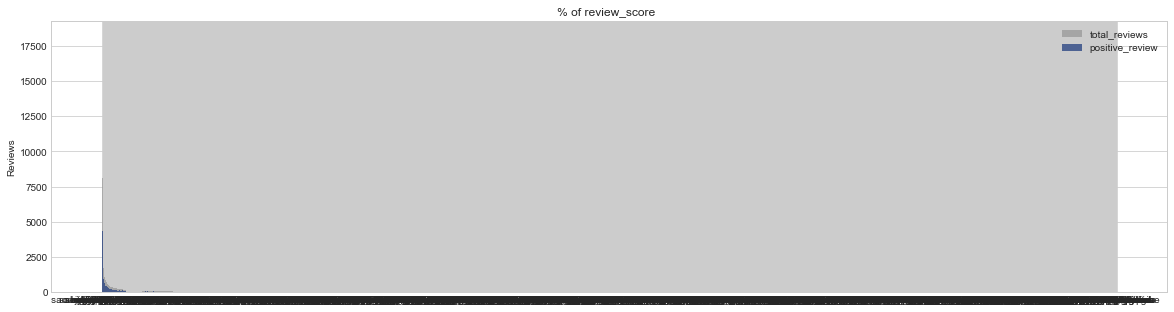

,customer_city,Positive_Review,total,mean
3531,sao paulo,10782,18369,0.586967
3097,rio de janeiro,4332,8094,0.535211
446,belo horizonte,1815,3208,0.565773
548,brasilia,1232,2253,0.546826
1127,curitiba,1069,1795,0.595543


In [109]:


temp=DatsetBar(new_df_string,'customer_city','review_score')
stack_plot(temp, 'customer_city', 'Positive_Review', col3='total')
temp.head()

<b>Observation of Feature customer_city</b>
1. Two many category belong to customer_city. and Contribution is very small 
2. This Featue will be  not useful for model.

In [110]:
df_final.drop(columns=['customer_city'],inplace=True,axis=1)

## Categorical Feature customer_state Analysis 

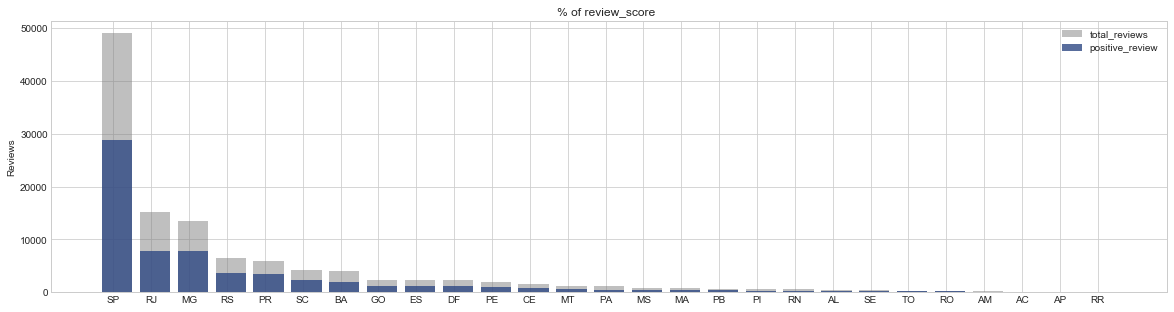

,customer_state,Positive_Review,total,mean
25,SP,28858,49018,0.588723
18,RJ,7912,15127,0.523038
10,MG,7749,13487,0.574553
22,RS,3588,6414,0.559401
17,PR,3421,5883,0.581506


In [111]:

temp=DatsetBar(new_df_string,'customer_state','review_score')
stack_plot(temp, 'customer_state', 'Positive_Review', col3='total')
temp.head()

<b>Observation of Feature customer_state</b>
1. The customer state SP have high number of data point 49018
2. The other state RJ high number of customer 15127
3. Not one state contribute high. All the state contribution different.
4. So this feature is important

https://towardsdatascience.com/exploratory-data-analysis-of-kaggle-datasets-9a293886f644

link for analysis the categorical data

## Categorical Feature order_status Analysis 

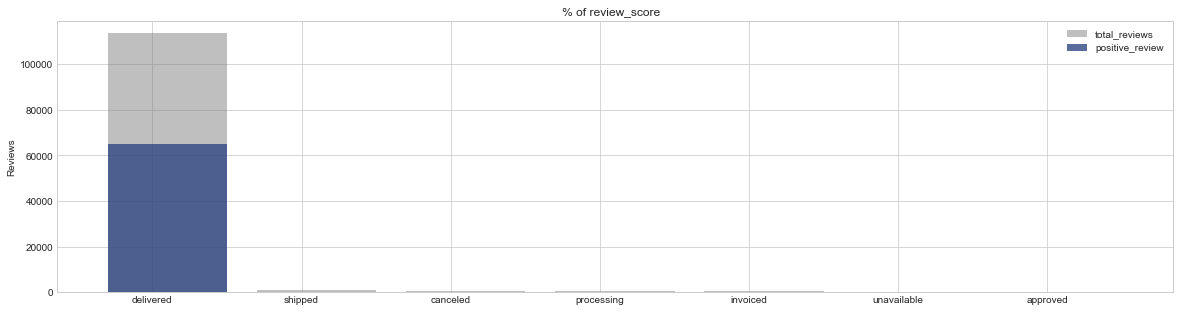

,order_status,Positive_Review,total,mean
2,delivered,64929,113509,0.572016
5,shipped,136,1219,0.111567
1,canceled,46,547,0.084095
4,processing,12,361,0.033241
3,invoiced,28,360,0.077778


In [112]:
temp=DatsetBar(new_df_string,'order_status','review_score')
stack_plot(temp, 'order_status', 'Positive_Review', col3='total')
temp.head()

Text(0.5,1,'Count of payment_type with order_status')

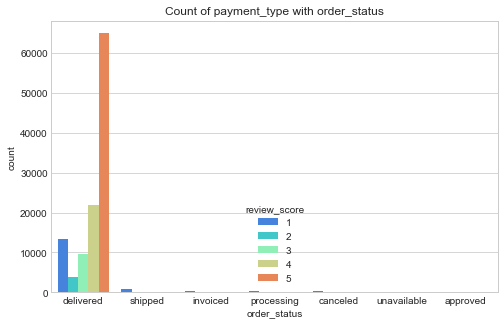

In [113]:
#https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec
plt.figure(figsize=(8,5))
sns.countplot(x='order_status',data=new_df_string, palette='rainbow',hue='review_score')
plt.title("Count of payment_type with order_status")

<b>Observation of Feature order_status</b>
1. From first plot we can see that only one category delivered highest count 113509 and give higest positive review.
2. Here only one categry delivered is giving result. 
3. So like other analysis can we drop this feature ?. No Because we are predicting the score based on delivered product
4. So this feature is important

## Categorical Feature geolocation_city_customer Analysis 

In [114]:
new_df_string.geolocation_city_customer
new_df_string.loc[:,['geolocation_city_customer','customer_city']]


,geolocation_city_customer,customer_city
0,franca,franca
1,santarém,santarem
2,santarém,santarem
3,nova santa rita,nova santa rita
4,magé,mage
...,...,...
116576,vargem bonita,vargem bonita
116577,limeira,limeira
116578,sao joao da boa vista,sao joao da boa vista
116579,belo horizonte,belo horizonte


<b>Observation of Feature geolocation_city_customer</b>
1. geolocation_city_customer is same as customer_city so drop this coloumn

In [115]:
#drop from final data frame
df_final.drop(columns='geolocation_city_customer',inplace=True,axis=1)

## Categorical Feature geolocation_state_customer Analysis 

In [116]:
new_df_string.loc[:,['geolocation_state_customer','customer_state']]

,geolocation_state_customer,customer_state
0,SP,SP
1,PA,PA
2,PA,PA
3,RS,RS
4,RJ,RJ
...,...,...
116576,SC,SC
116577,SP,SP
116578,SP,SP
116579,MG,MG


<b>Observation of Feature geolocation_state_customer</b>
1. geolocation_state_customer is same as customer_state so drop this coloumn
2. Same observation i found in geolocation_city_seller and in geolocation_state_seller so remove these feature because thease feature is duplicate

In [117]:
#drop from final data frame
df_final.drop(columns='geolocation_state_customer',inplace=True,axis=1)
df_final.drop(columns=['geolocation_city_seller','geolocation_state_seller'],inplace=True,axis=1)

## Categorical Feature seller_city Analysis 

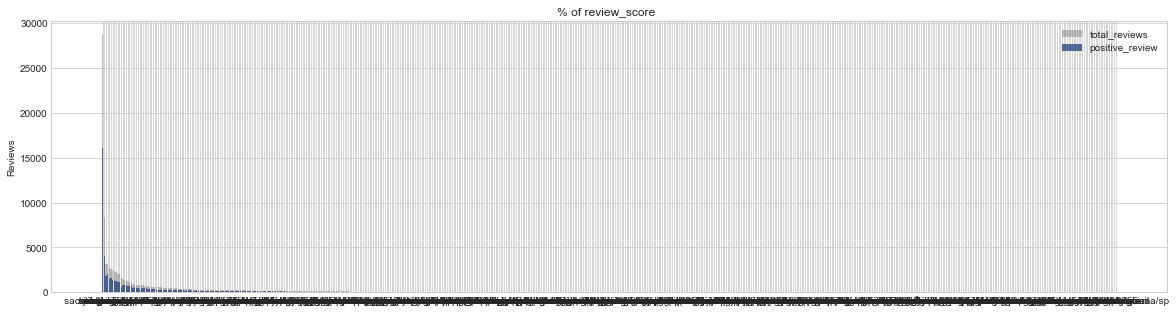

,seller_city,Positive_Review,total,mean
511,sao paulo,16062,28840,0.556935
225,ibitinga,4001,8304,0.481816
477,santo andre,1846,3132,0.589400
158,curitiba,2012,3114,0.646114
501,sao jose do rio preto,1504,2682,0.560776


In [118]:
temp=DatsetBar(new_df_string,'seller_city','review_score')
stack_plot(temp, 'seller_city', 'Positive_Review', col3='total')
temp.head()

<b>Observation of Feature seller_city	</b>
1. sao paulo state higest number of saller delevered most of the product with positive review 
2. right skewed distribution we can see 
3. consider this feature

## Categorical Feature seller_state Analysis 


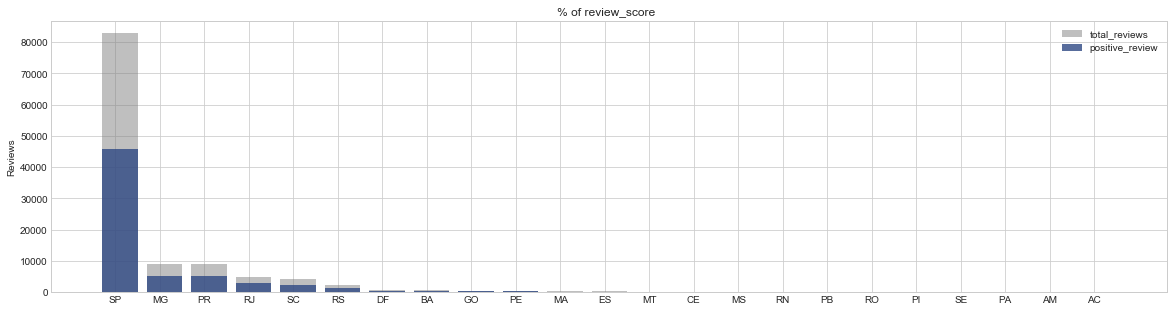

,seller_state,Positive_Review,total,mean
22,SP,45735,82744,0.552729
8,MG,5187,9007,0.575885
15,PR,5222,9006,0.579836
16,RJ,2986,4934,0.605188
20,SC,2472,4248,0.581921


In [119]:

temp=DatsetBar(new_df_string,'seller_state','review_score')
stack_plot(temp, 'seller_state', 'Positive_Review', col3='total')
temp.head()

<b>Observation of Feature seller_city	</b>
1. SP state higest number of saller delevered most of the product with positive review 
2. right skewed distribution we can see 
3. consider this feature

In [120]:

new_df_string.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_city_customer', 'geolocation_state_customer', 'order_id',
       'order_status', 'payment_type', 'product_id', 'seller_id',
       'product_category_name', 'seller_city', 'seller_state',
       'geolocation_city_seller', 'geolocation_state_seller',
       'product_category_name_english', 'review_score'],
      dtype='object')

In [121]:
df_final.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116580
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customer_id                    116006 non-null  object
 1   customer_unique_id             116006 non-null  object
 2   customer_state                 116006 non-null  object
 3   order_id                       116006 non-null  object
 4   order_status                   116006 non-null  object
 5   payment_type                   116006 non-null  object
 6   product_id                     116006 non-null  object
 7   seller_id                      116006 non-null  object
 8   product_category_name          116006 non-null  object
 9   seller_city                    116006 non-null  object
 10  seller_state                   116006 non-null  object
 11  product_category_name_english  116006 non-null  object
 12  Month_Year_Purchase_Order      116006 non-nu

In [122]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix_customer',
       'customer_state', 'order_id', 'order_status', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_seller', 'seller_city', 'seller_state',
       'product_category_name_english', 'price_new', 'freight_value_new',
       'product_length_cm_new', 'product_weight_g_new', 'payment_value_new',
       'payment_installments_new', 'Duration_delivered_Purchase_days',
       'Delivered_Within_Estimated', 'Month_Year_Purchase_Order',
       'Month_year_order_deliverd'],
      dtype='object')

In [123]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix_customer',
       'customer_state', 'order_id', 'order_status', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_seller', 'seller_city', 'seller_state',
       'product_category_name_english', 'price_new', 'freight_value_new',
       'product_length_cm_new', 'product_weight_g_new', 'payment_value_new',
       'payment_installments_new', 'Duration_delivered_Purchase_days',
       'Delivered_Within_Estimated', 'Month_Year_Purchase_Order',
       'Month_year_order_deliverd'],
      dtype='object')

In [124]:
# len(np.unique(df_final.customer_id))
# df_final[df_final.customer_id.duplicated(False)].groupby('payment_type')['review_score'].count()

In [125]:
#df_final[df_final.customer_id.duplicated(False)]

## Drop Duplicate data

In [126]:
#df_final[df_final.duplicated(keep=False)]
df_final.drop_duplicates(keep='first',inplace=True)

In [127]:
df_final.shape

(115597, 38)

## Drop Unique id feature

In [128]:
df_final.drop(columns=['customer_id','customer_unique_id','order_id','order_item_id','product_id','seller_id','zip_code_prefix_customer'],inplace=True)


In [129]:
df_final

,customer_state,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_score,price,freight_value,product_category_name,...,price_new,freight_value_new,product_length_cm_new,product_weight_g_new,payment_value_new,payment_installments_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated,Month_Year_Purchase_Order,Month_year_order_deliverd
0,SP,delivered,1,credit_card,2,146.87,4,124.99,21.88,moveis_escritorio,...,24998.0,21.8800,54.0,393.073789,17918.14,70,8,11,5_2017,5_2017
1,PA,delivered,1,credit_card,1,275.79,1,112.99,24.90,moveis_escritorio,...,22598.0,24.9000,54.0,393.073789,275.79,35,18,21,11_2017,11_2017
2,PA,delivered,1,credit_card,1,275.79,1,112.99,24.90,moveis_escritorio,...,22598.0,24.9000,54.0,393.073789,275.79,35,18,21,11_2017,11_2017
3,RS,delivered,1,credit_card,7,140.61,3,124.99,15.62,moveis_escritorio,...,24998.0,2803.0090,54.0,393.073789,17154.42,7,18,17,5_2017,5_2017
4,RJ,delivered,1,credit_card,10,137.58,4,106.99,30.59,moveis_escritorio,...,21398.0,30.5900,54.0,393.073789,16784.76,10,25,21,2_2018,2_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,SC,delivered,1,credit_card,8,426.70,4,389.00,37.70,la_cuisine,...,389.0,37.7000,83.0,565.866908,426.70,8,6,11,3_2018,4_2018
116577,SP,delivered,1,boleto,1,63.25,1,24.00,10.81,la_cuisine,...,4800.0,1939.8545,651.0,450.000000,7716.50,35,8,16,4_2017,4_2017
116578,SP,delivered,1,credit_card,3,160.46,5,139.00,21.46,la_cuisine,...,139.0,21.4600,84.0,99.592576,19576.12,105,8,13,8_2017,9_2017
116579,MG,delivered,1,credit_card,2,55.18,5,129.00,26.18,la_cuisine,...,25800.0,26.1800,85.0,122.227252,6731.96,70,9,18,7_2017,8_2017


In [131]:
import _pickle as cPickle
import _pickle as pickle

with open(r"Final_Updated_Engg_Oct_new.pickle", "wb") as output_file:
    cPickle.dump(df_final,output_file)

In [138]:
file = open("Final_Updated_Engg_Oct_new.pickle",'rb')
df_final = pickle.load(file)
file.close()
df_final.columns

Index(['customer_state', 'order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_seller', 'seller_city', 'seller_state',
       'product_category_name_english', 'price_new', 'freight_value_new',
       'product_length_cm_new', 'product_weight_g_new', 'payment_value_new',
       'payment_installments_new', 'Duration_delivered_Purchase_days',
       'Delivered_Within_Estimated', 'Month_Year_Purchase_Order',
       'Month_year_order_deliverd'],
      dtype='object')

In [134]:
file = open("updated.pickle",'rb')
df_final = pickle.load(file)
file.close()

In [135]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix_customer',
       'customer_city', 'customer_state', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'geolocation_city_customer',
       'geolocation_state_customer', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'zip_code_prefix_seller',
       'seller_city', 'seller_state', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_city_seller',

In [136]:
df_final

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,order_id,...,product_height_cm,product_width_cm,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,...,64.0,31.0,8577,itaquaquecetuba,SP,-23.482623,-46.374490,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442747,-54.728950,santarém,PA,c1d2b34febe9cd269e378117d6681172,...,64.0,31.0,8577,itaquaquecetuba,SP,-23.482623,-46.374490,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442747,-54.728950,santarém,PA,c1d2b34febe9cd269e378117d6681172,...,64.0,31.0,8577,itaquaquecetuba,SP,-23.482623,-46.374490,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,-29.856534,-51.268958,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,...,64.0,31.0,8577,itaquaquecetuba,SP,-23.482623,-46.374490,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,-22.627556,-43.159942,magé,RJ,2e604b3614664aa66867856dba7e61b7,...,64.0,31.0,8577,itaquaquecetuba,SP,-23.482623,-46.374490,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,-26.999694,-51.744482,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,...,21.0,43.0,89701,concordia,SC,-27.211808,-52.020991,concordia,SC,la_cuisine
116577,98a1b4f80dd0ccb7d1ae5a75ba5c904e,bf5ed75fca98e8f79c49e9a5bf7690e1,13480,limeira,SP,-22.564591,-47.403153,limeira,SP,28915ae2a90c218f0c2b7f8e0fb280e0,...,10.0,18.0,89701,concordia,SC,-27.211808,-52.020991,concordia,SC,la_cuisine
116578,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,-21.978415,-46.795615,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,...,12.0,15.0,89701,concordia,SC,-27.211808,-52.020991,concordia,SC,la_cuisine
116579,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,-19.938406,-43.937022,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,...,7.0,40.0,89701,concordia,SC,-27.211808,-52.020991,concordia,SC,la_cuisine
